In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smi
import scipy.stats as stats
import matplotlib.patches as mpatches

# 1. Préparation du dataframe

## 1.1 Chargement et examen rapide des fichiers

### 1.1.1 Produits

In [2]:
products = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P6/products.csv")

In [3]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [4]:
products.loc[products['id_prod'].duplicated(keep=False),:]

,id_prod,price,categ


Aucun doublon sur id_prod

In [5]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

Aucune valeur manquante

In [6]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [7]:
products.loc[products['price'] <= 0, :]

,id_prod,price,categ
731,T_0,-1.0,0


Un prix est négatif (produit test)

**Analyse des prix (valeurs atypiques)**

En premier lieu, je supprime le produit 'test' du fichier

In [8]:
prod1 = products.loc[products['id_prod'] != 'T_0', :]
prod1

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


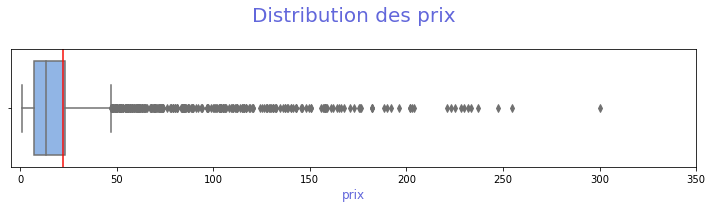

In [9]:
plt.figure(figsize=(10,3))
graph = sns.boxplot(x=prod1['price'],color='#83b3f3')
plt.gca().set_xlim(-5, 350)
plt.axvline(x=prod1['price'].mean(),color='#f60d06')
plt.xlabel("prix", fontsize=12, color='#6267db')
plt.title("Distribution des prix\n", fontsize=20, color='#6267db')
plt.tight_layout()

IQR Range semble laisser apparaître de nombreux outliers potentiels

En pratique, l’utilisation des scores z et IQR Range se limitent aux cas où la distribution suit une loi normale.
Cependant les distributions de prix suivent généralement une distribution log-normale. L'affectation du log permet donc le retour à une loi normale.

In [10]:
produit = prod1.copy()
produit['log(price)'] = np.log(produit['price'])
produit

,id_prod,price,categ,log(price)
0,0_1421,19.99,0,2.995232
1,0_1368,5.13,0,1.635106
2,0_731,17.99,0,2.889816
3,1_587,4.99,1,1.607436
4,0_1507,3.99,0,1.383791
...,...,...,...,...
3282,2_23,115.99,2,4.753504
3283,0_146,17.14,0,2.841415
3284,0_802,11.22,0,2.417698
3285,1_140,38.56,1,3.652215


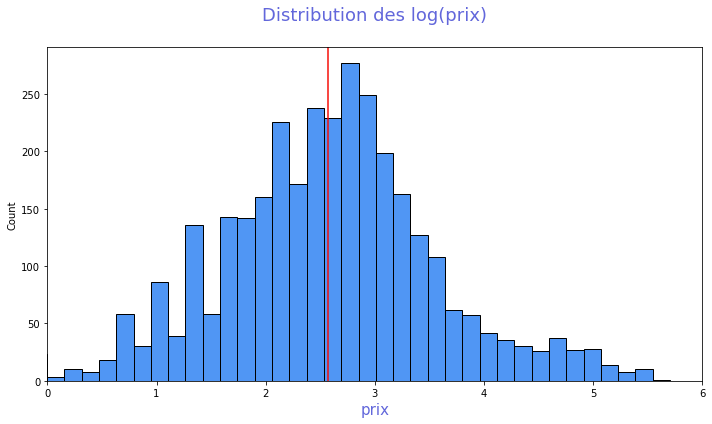

In [11]:
plt.figure(figsize=(10,6))
graph = sns.histplot(x=produit['log(price)'],color='#1673f1')
plt.gca().set_xlim(0, 6)
plt.axvline(x=produit['log(price)'].mean(),color='#f60d06')
plt.xlabel("prix", fontsize=15, color='#6267db')
plt.title("Distribution des log(prix)\n", fontsize=18, color='#6267db')
plt.tight_layout()

In [12]:
produit['zlog(price)'] = np.abs(stats.zscore(produit['log(price)']))
produit

,id_prod,price,categ,log(price),zlog(price)
0,0_1421,19.99,0,2.995232,0.431753
1,0_1368,5.13,0,1.635106,0.952270
2,0_731,17.99,0,2.889816,0.324484
3,1_587,4.99,1,1.607436,0.980426
4,0_1507,3.99,0,1.383791,1.208000
...,...,...,...,...,...
3282,2_23,115.99,2,4.753504,2.220915
3283,0_146,17.14,0,2.841415,0.275233
3284,0_802,11.22,0,2.417698,0.155928
3285,1_140,38.56,1,3.652215,1.100278


C:\Users\kant_\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


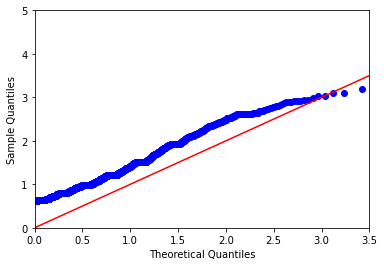

In [13]:
data = produit['zlog(price)']
fig1 = smi.qqplot(data, line='45')
plt.gca().set_xlim(0,3.5)
plt.gca().set_ylim(0,5)
plt.show()

In [14]:
outliers = produit.loc[produit['zlog(price)'] > 3, :]
outliers.sort_values(by='zlog(price)',ascending=False)

,id_prod,price,categ,log(price),zlog(price)
947,2_2,300.00,2,5.703782,3.187889
2272,0_528,0.62,0,-0.478036,3.102537
2355,0_202,0.62,0,-0.478036,3.102537
370,0_120,0.66,0,-0.415515,3.038918
724,2_76,254.44,2,5.539065,3.020278


5 outliers avec le z score : 3 tarifs inférieurs à 0.70€ et 2 tarifs supérieurs à 250€

In [15]:
Q1 = np.percentile(produit['log(price)'], 25)
Q3 = np.percentile(produit['log(price)'], 75)
IQR = Q3 - Q1
IQR
lim_sup = Q3+1.5*IQR
lim_inf = Q1-1.5*IQR
lim_sup

4.920927512569147

In [16]:
lim_inf

0.15861238245166231

In [17]:
outliers2 = produit.loc[(produit['log(price)'] >= lim_sup) | (produit['log(price)'] <= lim_inf) ,:]
outl = outliers2.sort_values(by='price',ascending=False)
outl

,id_prod,price,categ,log(price),zlog(price)
947,2_2,300.00,2,5.703782,3.187889
724,2_76,254.44,2,5.539065,3.020278
394,2_158,247.22,2,5.510279,2.990985
1436,2_167,236.99,2,5.468018,2.947982
2779,2_30,233.54,2,5.453353,2.933060
...,...,...,...,...,...
1530,0_1620,0.80,0,-0.223144,2.843166
1211,0_1844,0.77,0,-0.261365,2.882059
370,0_120,0.66,0,-0.415515,3.038918
2272,0_528,0.62,0,-0.478036,3.102537


In [18]:
outl.head(60)

,id_prod,price,categ,log(price),zlog(price)
947,2_2,300.00,2,5.703782,3.187889
724,2_76,254.44,2,5.539065,3.020278
394,2_158,247.22,2,5.510279,2.990985
1436,2_167,236.99,2,5.468018,2.947982
2779,2_30,233.54,2,5.453353,2.933060
1960,2_125,231.99,2,5.446694,2.926284
2487,2_166,230.04,2,5.438253,2.917695
786,2_40,228.11,2,5.429828,2.909121
10,2_228,225.17,2,5.416856,2.895921
1896,2_4,222.97,2,5.407037,2.885930


Cette méthode fait apparaitre en outliers les prix > à 138 € et inférieurs à 1,15 €

*Analyse par catégorie*

Nous pouvons également considérer la position des ces prix au sein de leur catégorie 2, sachant que la moyenne des prix de produits de catégorie 2 s'élève à 108.35 €

In [19]:
produit.groupby('categ').mean()['price']

categ
0     11.732795
1     25.531421
2    108.354686
Name: price, dtype: float64

In [20]:
p2 = produit.loc[produit['categ'] == 2, :]
p2

,id_prod,price,categ,log(price),zlog(price)
10,2_228,225.17,2,5.416856,2.895921
38,2_100,72.11,2,4.278193,1.737253
64,2_89,107.99,2,4.682039,2.148194
73,2_225,157.99,2,5.062532,2.535372
79,2_187,157.99,2,5.062532,2.535372
...,...,...,...,...,...
3188,2_99,84.99,2,4.442534,1.904481
3196,2_238,93.92,2,4.542443,2.006146
3267,2_101,63.99,2,4.158727,1.615688
3271,2_123,147.99,2,4.997145,2.468836


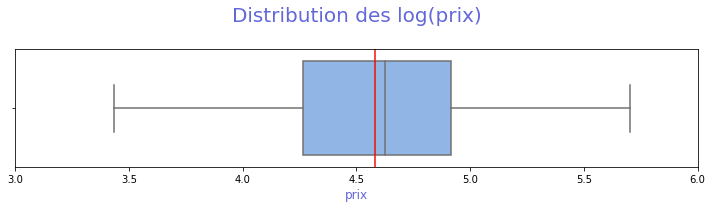

In [21]:
plt.figure(figsize=(10,3))
graph = sns.boxplot(x=p2['log(price)'],color='#83b3f3')
plt.gca().set_xlim(3, 6)
plt.axvline(x=p2['log(price)'].mean(),color='#f60d06')
plt.xlabel("prix", fontsize=12, color='#6267db')
plt.title("Distribution des log(prix)\n", fontsize=20, color='#6267db')
plt.tight_layout()

In [22]:
QQ1 = np.percentile(p2['log(price)'], 25)
QQ3 = np.percentile(p2['log(price)'], 75)
IQRR = QQ3 - QQ1
IQRR
lim_sup1 = QQ3+1.5*IQRR
lim_inf1 = QQ1-1.5*IQRR
lim_sup1

5.895957432682552

In [23]:
outliers3 = p2.loc[(p2['log(price)'] >= lim_sup1) ,:]

In [24]:
cat2 = p2.copy()
cat2['zlog(price)2'] = np.abs(stats.zscore(cat2['log(price)']))
cat2

,id_prod,price,categ,log(price),zlog(price),zlog(price)2
10,2_228,225.17,2,5.416856,2.895921,1.809359
38,2_100,72.11,2,4.278193,1.737253,0.659405
64,2_89,107.99,2,4.682039,2.148194,0.216183
73,2_225,157.99,2,5.062532,2.535372,1.041140
79,2_187,157.99,2,5.062532,2.535372,1.041140
...,...,...,...,...,...,...
3188,2_99,84.99,2,4.442534,1.904481,0.303094
3196,2_238,93.92,2,4.542443,2.006146,0.086477
3267,2_101,63.99,2,4.158727,1.615688,0.918423
3271,2_123,147.99,2,4.997145,2.468836,0.899373


In [25]:
outliers4 = cat2.loc[cat2['zlog(price)2'] > 3, :]
outliers4

,id_prod,price,categ,log(price),zlog(price),zlog(price)2


Au vu de la répartition catégorielle, ces valeurs semblent atypiques et non aberrantes(pas d'erreur d'écriture des prix).Je choisis donc de les conserver dans le cadre de mon analyse.

### 1.1.2 Clients

In [26]:
customers = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P6/customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [27]:
customers.loc[customers['client_id'].duplicated(keep=False),:]

,client_id,sex,birth


Aucun doublon sur la colonne id_client


In [28]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Aucune valeur manquante


In [29]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [30]:
customers.sort_values(by='client_id')

,client_id,sex,birth
4299,c_1,m,1955
6894,c_10,m,1956
2137,c_100,m,1992
8472,c_1000,f,1966
3426,c_1001,m,1982
...,...,...,...
94,c_997,f,1994
2145,c_998,m,2001
7358,c_999,m,1964
2735,ct_0,f,2001


Deux clients "test" sont introduits dans ce fichier. Je choisis de les supprimer.

In [31]:
clients = customers.loc[(customers['client_id'] != "ct_0") & (customers['client_id'] != "ct_1"),:]
clients.sort_values(by='client_id')

,client_id,sex,birth
4299,c_1,m,1955
6894,c_10,m,1956
2137,c_100,m,1992
8472,c_1000,f,1966
3426,c_1001,m,1982
...,...,...,...
7004,c_995,m,1955
2788,c_996,f,1970
94,c_997,f,1994
2145,c_998,m,2001


### 1.1.3 Commandes

In [32]:
transactions = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P6/transactions.csv")

In [33]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [34]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

Aucune valeur manquante n'est présente

In [35]:
doublons = transactions.loc[transactions[['id_prod','session_id','date','client_id']].duplicated(keep=False),:]
doublons

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Il existe de nombreux doublons dans ce fichier


In [36]:
T0 = transactions.loc[transactions['id_prod'] == 'T_0', :]
T0

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [37]:
doublons[doublons["date"].str.contains("test") == False]

,id_prod,date,session_id,client_id


In [38]:
ct = ['ct_0','ct_1']
t1 = transactions.loc[transactions['client_id'].isin(ct),:]

In [39]:
t2 = transactions.loc[transactions['id_prod'] == 'T_0',:]

In [40]:
(t1 == t2).all()

id_prod       True
date          True
session_id    True
client_id     True
dtype: bool

L'ensemble de ces doublons font référence à des commandes 'test', comprenant un produit "test" (T_0), une session "test" (s_0) et deux clients "test" (ct_0 et ct_1). Je supprime l'ensemble des lignes test du fichier transactions.

In [41]:
commande = transactions.loc[transactions['id_prod'] != 'T_0', :]
commande.sort_values(by='client_id')

,id_prod,date,session_id,client_id
329998,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1
663307,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1
16222,0_1470,2021-06-11 21:02:39.382765,s_47346,c_1
581356,0_1378,2022-08-23 16:56:15.401655,s_257402,c_1
318987,0_1880,2021-11-04 18:37:01.482109,s_114737,c_1
...,...,...,...,...
424227,1_247,2022-03-24 09:39:50.831782,s_183752,c_999
89918,1_251,2021-11-09 09:06:38.818975,s_116988,c_999
369011,1_724,2022-01-19 09:10:14.900805,s_152063,c_999
344768,1_381,2022-11-14 07:48:55.723362,s_297376,c_999


In [42]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [43]:
commande.describe()

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609
freq,2252,1,14,25488


## 1.2 Jointures et reexamen des dataframes

### 1.2.1 Produits et commandes

In [44]:
command = pd.merge(commande,prod1,on='id_prod',how='outer',indicator = True)
command

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679348,0_1624,NaN,NaN,NaN,24.50,0.0,right_only
679349,2_86,NaN,NaN,NaN,132.36,2.0,right_only
679350,0_299,NaN,NaN,NaN,22.99,0.0,right_only
679351,0_510,NaN,NaN,NaN,23.66,0.0,right_only


In [45]:
nn_com = command.loc[command['_merge'] == 'right_only', :]
nn_com

,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaN,NaN,NaN,2.99,0.0,right_only


In [46]:
nn_com.describe()

,price,categ
count,21.000000,21.000000
mean,37.870476,0.380952
std,56.619963,0.740013
min,0.800000,0.000000
25%,2.990000,0.000000
50%,22.050000,0.000000
75%,31.820000,0.000000
max,220.990000,2.000000


21 produits n'ont pas encore fait l'objet d'une commande à ce jour. Je supprime ces données du dataframe.

In [47]:
command1 = command.loc[command['_merge'] != 'right_only', :]
command1

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,20.99,0.0,both
679328,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0.0,both
679329,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2.99,0.0,both
679330,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,21.82,0.0,both


**Cas du produit 0_2245**

In [48]:
command1.loc[command1['_merge'] == 'left_only', :]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


In [49]:
P0_2245 = command1.loc[(command1['id_prod'] == '0_2245') & (command1['price'].isnull()), :]
P0_2245

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


Le produit '0_2245' a fait l'objet de 221 commandes mais n'est pas recensé dans le catalogue des produits.  
Je choisis d'estimer le prix de ce produit en réalisant la moyenne des prix de catégorie 0. Cette estimation pourra donc impacter le calcul du chiffre d'affaires.

In [50]:
produit.groupby('categ').mean()['price']

categ
0     11.732795
1     25.531421
2    108.354686
Name: price, dtype: float64

J'affecte donc le prix de 11.73 € à chaque commande du produit 0_2245. Je renseigne également la catégorie 0.

In [51]:
command2 = command1.copy()
command2.loc[command2['id_prod'] == '0_2245','price'] = 11.73
command2.loc[command2['id_prod'] == '0_2245',:]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,11.73,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,11.73,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,11.73,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,11.73,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,11.73,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,11.73,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,11.73,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,11.73,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,11.73,NaN,left_only


In [52]:
command3 = command2.copy()
command3.loc[command3['id_prod'] == '0_2245','categ'] = 0
command3.loc[command3['id_prod'] == '0_2245',:]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,11.73,0.0,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,11.73,0.0,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,11.73,0.0,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,11.73,0.0,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,11.73,0.0,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,11.73,0.0,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,11.73,0.0,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,11.73,0.0,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,11.73,0.0,left_only


In [53]:
command4 = command3[['id_prod','date','session_id','client_id','price','categ']]
command4

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0
...,...,...,...,...,...,...
679327,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,20.99,0.0
679328,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0.0
679329,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2.99,0.0
679330,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,21.82,0.0


Je modifie également le catalogue des produits en ajoutant le produit 0_2245

In [54]:
prod1 = prod1.append({'id_prod' : '0_2245', 'price' : 11.73,'categ' : 0} , ignore_index=True)

### 1.2.2 Commandes/Produits et clients

In [55]:
commun = pd.merge(command4,clients,on='client_id',how='outer',indicator=True)
commun

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,both
...,...,...,...,...,...,...,...,...,...
679348,NaN,NaN,NaN,c_862,NaN,NaN,f,1956,right_only
679349,NaN,NaN,NaN,c_7584,NaN,NaN,f,1960,right_only
679350,NaN,NaN,NaN,c_90,NaN,NaN,m,2001,right_only
679351,NaN,NaN,NaN,c_587,NaN,NaN,m,1993,right_only


In [56]:
commun.loc[commun['_merge'] == 'left_only', :]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge


In [57]:
nn_clt = commun.loc[commun['_merge'] == 'right_only', :]
nn_clt

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
679332,NaN,NaN,NaN,c_8253,NaN,NaN,f,2001,right_only
679333,NaN,NaN,NaN,c_3789,NaN,NaN,f,1997,right_only
679334,NaN,NaN,NaN,c_4406,NaN,NaN,f,1998,right_only
679335,NaN,NaN,NaN,c_2706,NaN,NaN,f,1967,right_only
679336,NaN,NaN,NaN,c_3443,NaN,NaN,m,1959,right_only
679337,NaN,NaN,NaN,c_4447,NaN,NaN,m,1956,right_only
679338,NaN,NaN,NaN,c_3017,NaN,NaN,f,1992,right_only
679339,NaN,NaN,NaN,c_4086,NaN,NaN,f,1992,right_only
679340,NaN,NaN,NaN,c_6930,NaN,NaN,m,2004,right_only
679341,NaN,NaN,NaN,c_4358,NaN,NaN,m,1999,right_only


In [58]:
nn_clt.describe(include="all")

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
count,0,0,0,21,0.0,0.0,21,21.000000,21
unique,0,0,0,21,NaN,NaN,2,NaN,1
top,NaN,NaN,NaN,c_8253,NaN,NaN,f,NaN,right_only
freq,NaN,NaN,NaN,1,NaN,NaN,11,NaN,21
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984.380952,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.878320,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,NaN


21 clients n'ont pas commandé de produit. Je supprime ces clients du fichier.

In [59]:
commun1 = commun.loc[commun['_merge'] != 'right_only', :]

In [60]:
commun2 = commun1[['id_prod','date','session_id','client_id','price','categ','sex','birth']]
commun2

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986
...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992


In [61]:
commun2.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

# 2. Analyses univariées

## 2.1 Chiffre d'affaires

In [62]:
commun2['price'].sum()

11856321.010000002

le chiffre d'affaires total de la boutique est 11 856 321 €

### 2.1.1 Evolution dans le temps (mois par mois)

In [63]:
commun4 = commun2.copy()

In [64]:
commun4['date'] = pd.to_datetime(commun4['date'], format='%Y-%m-%d %H:%M:%S')

In [65]:
commun4['month_year'] = commun4['date'].dt.strftime('%Y-%m')

In [66]:
commun4

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08
...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03


In [67]:
prix_mois = commun4.groupby('month_year').sum()[['price']]
prix_mois = prix_mois.reset_index()
prix_mois

,month_year,price
0,2021-03,482546.18
1,2021-04,476273.52
2,2021-05,493037.31
3,2021-06,484170.67
4,2021-07,482882.32
5,2021-08,482390.36
6,2021-09,507381.44
7,2021-10,320880.85
8,2021-11,516285.03
9,2021-12,525999.39


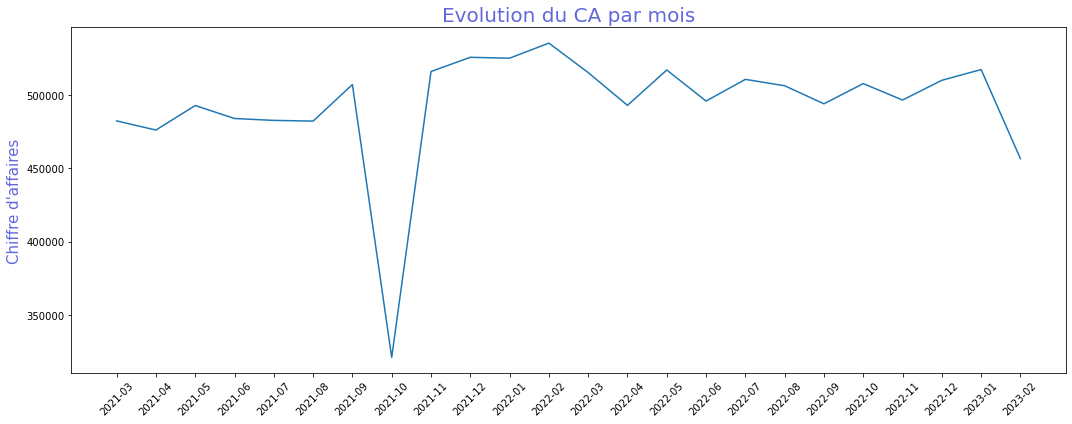

In [68]:
plt.figure(figsize=(15,6))
graph211 = plt.plot('month_year','price',data=prix_mois)
plt.ylabel("Chiffre d'affaires", fontsize=15, color='#6267db')
plt.xticks(rotation=45)
plt.title("Evolution du CA par mois", fontsize=20, color='#6267db')
plt.tight_layout()

Nous constatons une forte baisse du chiffre d'affaires sur le mois d'octobre 2021

**Recherche ciblée sur octobre 2021**

In [69]:
tableau = commun4.pivot_table(values=['id_prod'], index=["month_year"], columns=["categ"], aggfunc=np.size, margins=True, margins_name='Total')

In [70]:
tableau

id_prod                       
categ          0.0     1.0    2.0   Total
month_year                               
2021-03      18140    9134   1336   28610
2021-04      19356    7579   1522   28457
2021-05      18509    8107   1677   28293
2021-06      15905    9264   1688   26857
2021-07      13582    9169   1991   24742
2021-08      15737    7954   1968   25659
2021-09      23154    9268    904   33326
2021-10      18769    1666   1171   21606
2021-11      14610   12316   1395   28321
2021-12      19309   12259    896   32464
2022-01      15402   12560   1386   29348
2022-02      17292   10459   1854   29605
2022-03      18056   10126   1525   29707
2022-04      16479    9502   1635   27616
2022-05      18424   10047   1520   29991
2022-06      17278    9790   1443   28511
2022-07      17514    9470   1698   28682
2022-08      16658   10305   1589   28552
2022-09      17234    9566   1515   28315
2022-10      17674    9726   1574   28974
2022-11      17320    9798   1456   28574
2022-12      16941   10063   1621   28625
2023-01      17075   10252   1618   28945
2023-02      15262    8789   1501   25552
Total       415680  227169  36483  679332

In [71]:
tableau1 = tableau.drop(['Total'])
tableau1.mean()

         categ
id_prod  0.0      17320.000
         1.0       9465.375
         2.0       1520.125
         Total    28305.500
dtype: float64

La baisse du chiffre d'affaires en octobre 2021 est due à une **baisse conséquente des ventes sur les livres de catégorie 1** (seulement 1666 livres vendus alors que la moyenne mensuelle des ventes de la catégorie s'élève à 9465 livres).

In [72]:
tableau2= tableau1.reset_index()

In [73]:
tableau2.set_axis(['month_year','0.0','1.0','2.0','Total'], axis='columns', inplace=True)

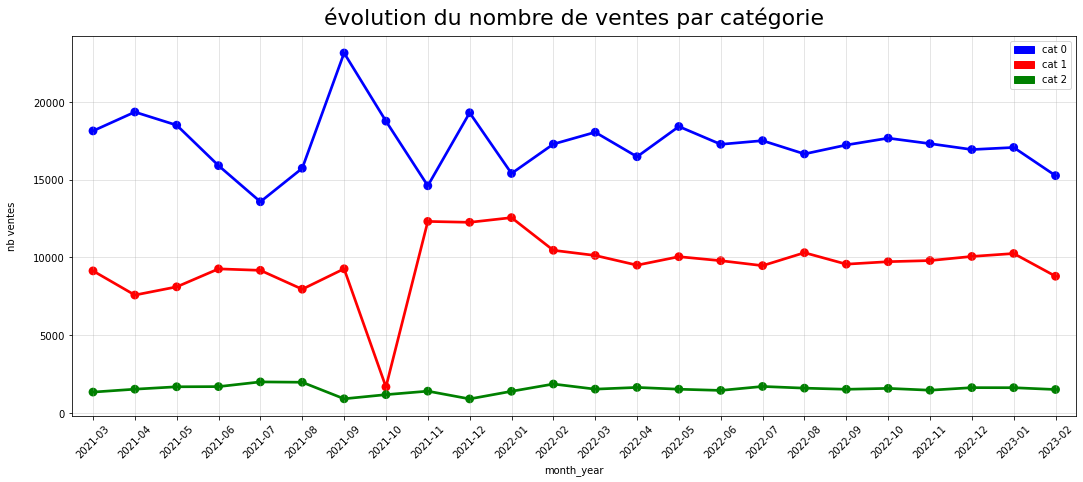

In [74]:
fig, ax = plt.subplots(figsize=(18,7))
g1=sns.pointplot(data = tableau2, x='month_year', y='0.0', color="b", 
                label='0')
g2=sns.pointplot(data = tableau2, x='month_year', y='1.0', color="r", 
                label='1')
g3=sns.pointplot(data = tableau2, x='month_year', y='2.0', color="g", 
                label='2')
ax.set_title('évolution du nombre de ventes par catégorie', fontsize=22, y=1.015)
ax.set_ylabel('nb ventes', labelpad=16)
blue_patch = mpatches.Patch(color='blue', label='cat 0')
red_patch = mpatches.Patch(color='red', label='cat 1')
green_patch = mpatches.Patch(color='green', label='cat 2')
plt.legend(handles=[blue_patch, red_patch, green_patch])
plt.grid(alpha=0.4)
t=plt.xticks(rotation=45)

In [75]:
oct1 = commun4.loc[commun4['month_year'] == '2021-10', :]

In [76]:
oct2021 = oct1.copy()
oct2021['date_jour'] = oct2021['date'].dt.strftime('%Y-%m-%d')

In [77]:
oct2021

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year,date_jour
41,0_2192,2021-10-28 07:35:26.214204,s_111235,c_103,16.87,0.0,f,1986,2021-10,2021-10-28
52,0_434,2021-10-23 12:41:03.390366,s_108948,c_103,16.97,0.0,f,1986,2021-10,2021-10-23
61,0_1020,2021-10-28 07:16:09.667580,s_111235,c_103,9.71,0.0,f,1986,2021-10,2021-10-28
62,0_1453,2021-10-06 18:34:39.902464,s_100965,c_103,7.99,0.0,f,1986,2021-10,2021-10-06
73,0_1403,2021-10-19 22:45:29.086913,s_107276,c_103,15.99,0.0,f,1986,2021-10,2021-10-19
...,...,...,...,...,...,...,...,...,...,...
679132,2_184,2021-10-31 02:28:39.926181,s_112528,c_3915,49.61,2.0,m,1996,2021-10,2021-10-31
679194,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,2021-10,2021-10-09
679262,0_1536,2021-10-19 10:30:12.732366,s_107038,c_5005,6.59,0.0,f,1992,2021-10,2021-10-19
679265,0_1829,2021-10-19 10:29:44.844616,s_107038,c_5005,4.99,0.0,f,1992,2021-10,2021-10-19


In [78]:
octjour=oct2021['date_jour'].unique()

In [79]:
octjour

array(['2021-10-28', '2021-10-23', '2021-10-06', '2021-10-19',
       '2021-10-29', '2021-10-27', '2021-10-16', '2021-10-17',
       '2021-10-14', '2021-10-25', '2021-10-31', '2021-10-10',
       '2021-10-13', '2021-10-12', '2021-10-05', '2021-10-30',
       '2021-10-02', '2021-10-20', '2021-10-08', '2021-10-26',
       '2021-10-18', '2021-10-22', '2021-10-15', '2021-10-04',
       '2021-10-01', '2021-10-09', '2021-10-11', '2021-10-21',
       '2021-10-07', '2021-10-03', '2021-10-24'], dtype=object)

In [80]:
oct_2021 = oct2021.loc[oct2021['categ'] == 1, :]

In [81]:
oct_2021['date_jour'].unique()

array(['2021-10-28', '2021-10-31', '2021-10-30', '2021-10-01',
       '2021-10-29'], dtype=object)

Sur la catégorie 1, il n'y a eu **aucune vente du 02/10 au 27/10 inclus**

In [82]:
tableau2= tableau1.reset_index()

In [83]:
tableau2.set_axis(['month_year','0.0','1.0','2.0','Total'], axis='columns', inplace=True)

In [84]:
tableau2

,month_year,0.0,1.0,2.0,Total
0,2021-03,18140,9134,1336,28610
1,2021-04,19356,7579,1522,28457
2,2021-05,18509,8107,1677,28293
3,2021-06,15905,9264,1688,26857
4,2021-07,13582,9169,1991,24742
5,2021-08,15737,7954,1968,25659
6,2021-09,23154,9268,904,33326
7,2021-10,18769,1666,1171,21606
8,2021-11,14610,12316,1395,28321
9,2021-12,19309,12259,896,32464


In [85]:
(tableau2.loc[(tableau2['month_year'] == '2022-01') |(tableau2['month_year'] == '2021-12') |(tableau2['month_year'] == '2021-11'),: ]).mean()['1.0']

C:\Users\kant_\AppData\Local\Temp/ipykernel_14136/479589045.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (tableau2.loc[(tableau2['month_year'] == '2022-01') |(tableau2['month_year'] == '2021-12') |(tableau2['month_year'] == '2021-11'),: ]).mean()['1.0']


12378.333333333334

In [86]:
12378 - 9465

2913

Concernant la catégorie 1, les 3 mois suivant oct 2021 enregistrent en moyenne près de 3 000 ventes de plus par rapport à la moyenne générale.  
Nous pouvons donc supposer un report des ventes du mois d'oct 2021 sur les mois suivants.

Ainsi, je ne supprimerai pas systématiquement ce mois pour la suite de mon analyse.

En rajoutant l'effet prix, l'impact de la baisse des ventes de la catégorie 1 sur le mois d'oct 2021 paraît encore plus conséquent

In [87]:
CA_cat = commun4.pivot_table(values=['price'], index=["month_year"], columns=["categ"], aggfunc=np.sum, margins=True, margins_name='Total')

In [88]:
CA_cat

price                                     
categ              0.0         1.0         2.0        Total
month_year                                                 
2021-03      193734.74   186974.17   101837.27    482546.18
2021-04      205386.68   156138.35   114748.49    476273.52
2021-05      196280.56   165893.40   130863.35    493037.31
2021-06      168025.26   189162.04   126983.37    484170.67
2021-07      144797.71   188523.27   149561.34    482882.32
2021-08      167843.19   162991.38   151555.79    482390.36
2021-09      246494.67   190613.78    70272.99    507381.44
2021-10      199332.94    33762.32    87785.59    320880.85
2021-11      156026.86   252910.39   107347.78    516285.03
2021-12      206118.35   251026.75    68854.29    525999.39
2022-01      164269.16   256267.92   104860.56    525397.64
2022-02      183326.36   213120.64   139253.53    535700.53
2022-03      191593.97   206485.26   117506.33    515585.56
2022-04      175161.48   195263.97   122737.71    493163.16
2022-05      195060.02   205532.63   116727.63    517320.28
2022-06      184016.97   201912.06   110169.20    496098.23
2022-07      187237.76   193969.72   129716.40    510923.88
2022-08      177466.60   211360.09   117734.42    506561.11
2022-09      183434.81   195379.54   115405.75    494220.10
2022-10      187546.47   199609.66   120878.94    508035.07
2022-11      184723.38   200427.99   111642.60    496793.97
2022-12      180541.08   205945.71   123803.09    510289.88
2023-01      181365.17   210104.41   126153.08    517622.66
2023-02      162539.11   180347.24   113875.52    456761.87
Total       4422323.30  4653722.69  2780275.02  11856321.01

In [89]:
CA_cat1 = CA_cat.drop(['Total'])
CA_cat1.mean()

       categ
price  0.0      184263.470833
       1.0      193905.112083
       2.0      115844.792500
       Total    494013.375417
dtype: float64

In [90]:
CA_cat2= CA_cat1.reset_index()

In [91]:
CA_cat2.set_axis(['month_year','0.0','1.0','2.0','Total'], axis='columns', inplace=True)

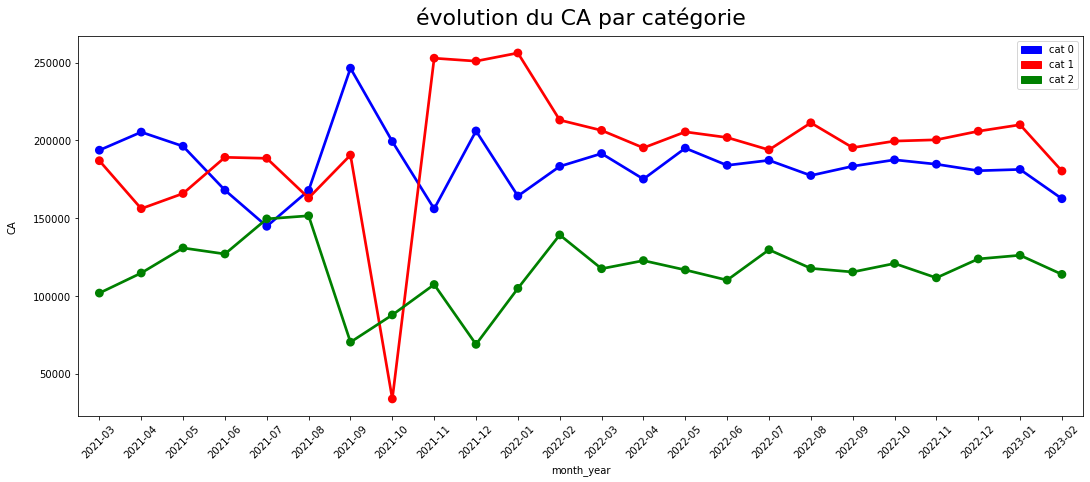

In [92]:
fig, ax = plt.subplots(figsize=(18,7))
g1=sns.pointplot(data = CA_cat2, x='month_year', y='0.0', color="b", 
                label='0')
g2=sns.pointplot(data = CA_cat2, x='month_year', y='1.0', color="r", 
                label='1')
g3=sns.pointplot(data = CA_cat2, x='month_year', y='2.0', color="g", 
                label='2')
ax.set_title('évolution du CA par catégorie', fontsize=22, y=1.015)
ax.set_ylabel('CA', labelpad=16)
blue_patch = mpatches.Patch(color='blue', label='cat 0')
red_patch = mpatches.Patch(color='red', label='cat 1')
green_patch = mpatches.Patch(color='green', label='cat 2')
plt.legend(handles=[blue_patch, red_patch, green_patch])
t=plt.xticks(rotation=45)

### 2.1.2 Moyenne mobile sur 3 mois consécutifs

In [93]:
prix_mois1 = prix_mois.rolling(3).mean()
prix_mois1.dropna()

,price
2,483952.336667
3,484493.833333
4,486696.766667
5,483147.783333
6,490884.706667
7,436884.216667
8,448182.440000
9,454388.423333
10,522560.686667
11,529032.520000


In [94]:
prix_mois1.index = ['01 à 03-2021','02 à 04-2021','03 à 05-2021', '04 à 06-2021', '05 à 07-2021', '06 à 08-2021', '07 à 09-2021','08 à 10-2021','09 à 11-2021','10 à 12-2021','11-2021 à 01-2022','12-2021 à 02-2022','01 à 03-2022','02 à 04-2022','03 à 05-2022','04 à 06-2022','05 à 07-2022','06 à 08-2022','07 à 09-2022','08 à 10-2022','09 à 11-2022','10 à 12-2022','11-2022 à 01-2023','12-2022 à 02-2023']

In [95]:
prix_mois1 = prix_mois1.rename_axis('Periode')

In [96]:
prix_mois2 = prix_mois1.reset_index()

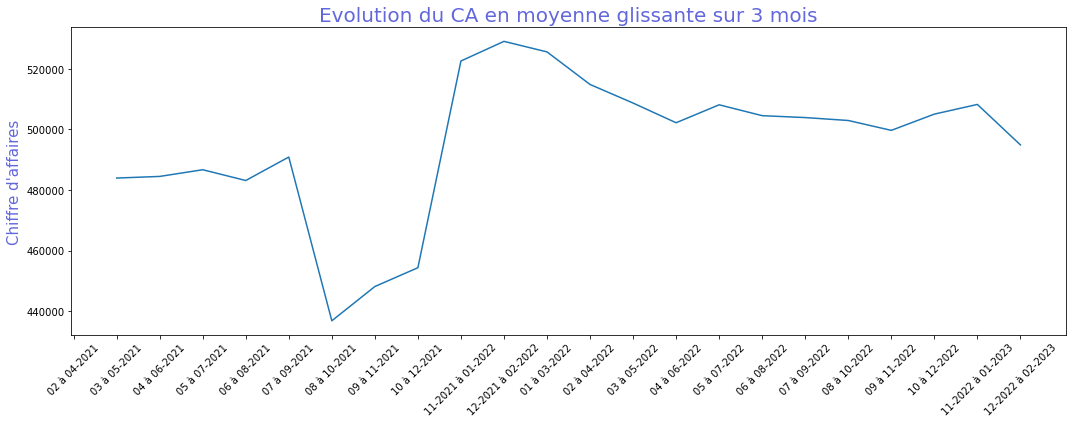

In [97]:
plt.figure(figsize=(15,6))
graph1 = plt.plot('Periode','price',data=prix_mois2)
plt.ylabel("Chiffre d'affaires", fontsize=15, color='#6267db')
plt.xticks(rotation=45)
plt.title("Evolution du CA en moyenne glissante sur 3 mois", fontsize=20, color='#6267db')
plt.tight_layout()

En moyenne glissante sur 3 mois, le mois d'octobre impacte fortement l'allure de la courbe

In [98]:
prix_mois3 = prix_mois.loc[prix_mois['month_year'] != '2021-10', :]
prix_mois3

,month_year,price
0,2021-03,482546.18
1,2021-04,476273.52
2,2021-05,493037.31
3,2021-06,484170.67
4,2021-07,482882.32
5,2021-08,482390.36
6,2021-09,507381.44
8,2021-11,516285.03
9,2021-12,525999.39
10,2022-01,525397.64


In [99]:
prix_mois5 = prix_mois3.rolling(3).mean()

In [100]:
prix_mois5.index = ['01 à 03-2021','02 à 04-2021','03 à 05-2021', '04 à 06-2021', '05 à 07-2021', '06 à 08-2021', '07 à 09-2021','08 à 11-2021','09 à 12-2021','11-2021 à 01-2022','12-2021 à 02-2022','01 à 03-2022','02 à 04-2022','03 à 05-2022','04 à 06-2022','05 à 07-2022','06 à 08-2022','07 à 09-2022','08 à 10-2022','09 à 11-2022','10 à 12-2022','11-2022 à 01-2023','12-2022 à 02-2023']

In [101]:
prix_mois5 = prix_mois5.rename_axis('Periode')

In [102]:
prix_mois5 = prix_mois5.reset_index()

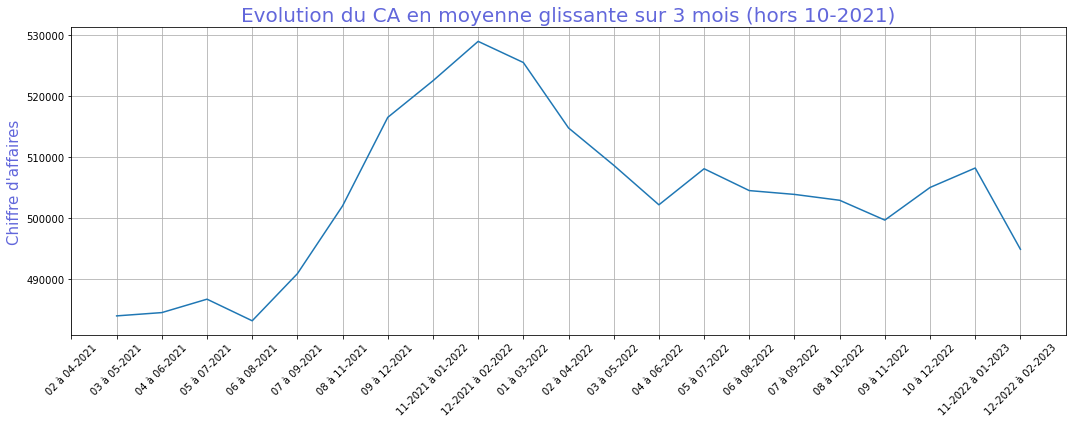

In [103]:
plt.figure(figsize=(15,6))
graph1 = plt.plot('Periode','price',data=prix_mois5)
plt.ylabel("Chiffre d'affaires", fontsize=15, color='#6267db')
plt.xticks(rotation=45)
plt.grid()
plt.title("Evolution du CA en moyenne glissante sur 3 mois (hors 10-2021)", fontsize=20, color='#6267db')
plt.tight_layout()

En supprimant l'effet du mois d'octobre, nous constatons que le CA est en évolution favorable jusqu'en février 2022 (530 000 € en moyenne glissante) avant de se stabiliser entre 500 000 et 510 000 €

La moyenne des 3 derniers mois passe en dessous des 500 000 €

In [104]:
CA_cat3 = CA_cat2.rolling(3).mean()
CA_cat3

,0.0,1.0,2.0,Total
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,198467.326667,169668.640000,115816.370000,483952.336667
3,189897.500000,170397.930000,124198.403333,484493.833333
4,169701.176667,181192.903333,135802.686667,486696.766667
5,160222.053333,180225.563333,142700.166667,483147.783333
6,186378.523333,180709.476667,123796.706667,490884.706667
7,204556.933333,129122.493333,103204.790000,436884.216667
8,200618.156667,159095.496667,88468.786667,448182.440000
9,187159.383333,179233.153333,87995.886667,454388.423333


In [105]:
CA_cat3.index = ['01 à 03-2021','02 à 04-2021','03 à 05-2021', '04 à 06-2021', '05 à 07-2021', '06 à 08-2021', '07 à 09-2021','08 à 10-2021','09 à 11-2021','10 à 12-2021','11-2021 à 01-2022','12-2021 à 02-2022','01 à 03-2022','02 à 04-2022','03 à 05-2022','04 à 06-2022','05 à 07-2022','06 à 08-2022','07 à 09-2022','08 à 10-2022','09 à 11-2022','10 à 12-2022','11-2022 à 01-2023','12-2022 à 02-2023']

In [106]:
CA_cat4 = CA_cat3.rename_axis('Periode')

In [107]:
CA_cat4=CA_cat4.reset_index()

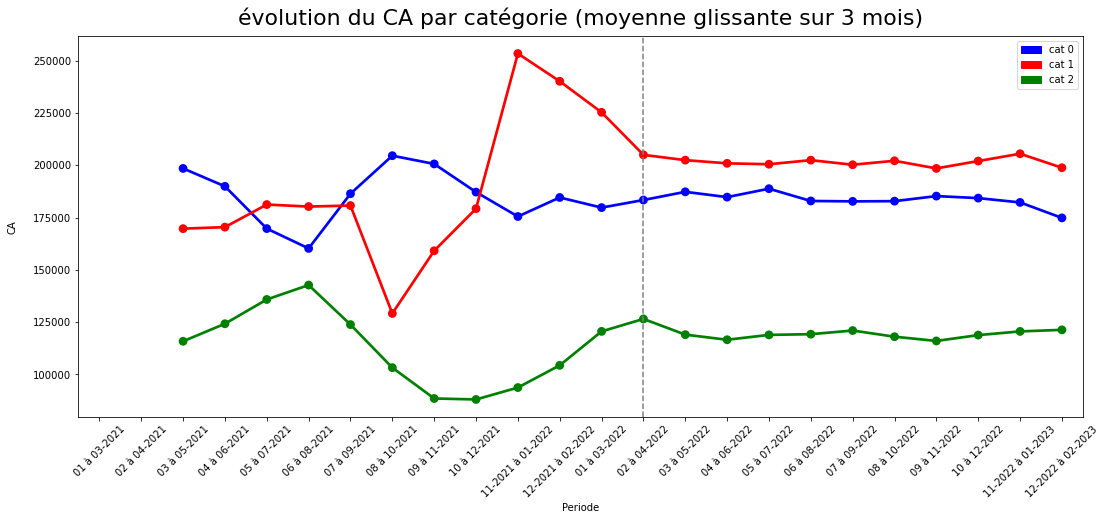

In [108]:
fig, ax = plt.subplots(figsize=(18,7))
g1=sns.pointplot(data = CA_cat4, x='Periode', y='0.0', color="b")
g2=sns.pointplot(data = CA_cat4, x='Periode', y='1.0', color="r")
g3=sns.pointplot(data = CA_cat4, x='Periode', y='2.0', color="g")
ax.set_title('évolution du CA par catégorie (moyenne glissante sur 3 mois)', fontsize=22, y=1.015)
ax.set_ylabel('CA', labelpad=16)
plt.axvline(x=13,color='grey',linestyle="--")
blue_patch = mpatches.Patch(color='blue', label='cat 0')
red_patch = mpatches.Patch(color='red', label='cat 1')
green_patch = mpatches.Patch(color='green', label='cat 2')
plt.legend(handles=[blue_patch, red_patch, green_patch])
t=plt.xticks(rotation=45)

Constatons que les moyennes glissantes se stabilisent sur la seconde partie de la période étudiée (à partir de la période 02 à 04-2022)

## 2.2 Zoom sur les références

### 2.2.1 Les Tops

#### En nombre de ventes

In [109]:
commun4

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08
...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03


In [110]:
nb_vente = commun4.groupby('id_prod').size()
nb_vente

id_prod
0_0       1242
0_1        487
0_10        22
0_100        3
0_1000     432
          ... 
2_95         4
2_96       598
2_97        13
2_98         1
2_99         7
Length: 3266, dtype: int64

In [111]:
nb_vente1 = nb_vente.reset_index()

In [112]:
nb_vente1.set_axis(['id_prod','nb_vente'], axis='columns', inplace=True)

In [113]:
top = nb_vente1.sort_values(by='nb_vente',ascending=False)

In [114]:
top.loc[top['nb_vente']>2000, :]

,id_prod,nb_vente
2592,1_369,2252
2645,1_417,2189
2642,1_414,2180
2734,1_498,2128
2654,1_425,2096


5 références ont été vendues à plus de 2000 exemplaires

In [115]:
top1 = pd.merge(top,prod1, on='id_prod',how='left')

In [116]:
top1.head(51)

,id_prod,nb_vente,price,categ
0,1_369,2252,23.99,1
1,1_417,2189,20.99,1
2,1_414,2180,23.83,1
3,1_498,2128,23.37,1
4,1_425,2096,16.99,1
5,1_403,1960,17.99,1
6,1_412,1951,16.65,1
7,1_413,1945,17.99,1
8,1_406,1939,24.81,1
9,1_407,1935,15.99,1


Les 50 produits les plus vendus sont issus de la catégorie 1

#### En chiffre d'affaires

In [117]:
top1['CA par prod'] = top1['nb_vente'] * top1['price']
top1

,id_prod,nb_vente,price,categ,CA par prod
0,1_369,2252,23.99,1,54025.48
1,1_417,2189,20.99,1,45947.11
2,1_414,2180,23.83,1,51949.40
3,1_498,2128,23.37,1,49731.36
4,1_425,2096,16.99,1,35611.04
...,...,...,...,...,...
3261,0_1284,1,1.38,0,1.38
3262,0_549,1,2.99,0,2.99
3263,0_1498,1,2.48,0,2.48
3264,0_541,1,1.99,0,1.99


In [118]:
top2 = top1.copy()

In [119]:
top3 = top2.sort_values(by='CA par prod',ascending=False)
top3.head(10)

,id_prod,nb_vente,price,categ,CA par prod
340,2_159,650,145.99,2,94893.50
146,2_135,1005,68.99,2,69334.95
165,2_112,968,67.57,2,65407.76
132,2_102,1027,59.14,2,60736.78
236,2_209,814,69.99,2,56971.86
12,1_395,1875,28.99,1,54356.25
0,1_369,2252,23.99,1,54025.48
205,2_110,865,62.25,2,53846.25
186,2_39,915,57.99,2,53060.85
836,2_166,228,230.04,2,52449.12


Les 5 livres qui générent le CA le plus élevé sont de catégorie 2

### 2.2.2 Les Flops

In [120]:
top1.tail(20)

,id_prod,nb_vente,price,categ,CA par prod
3246,0_453,2,29.99,0,59.98
3247,1_402,2,34.52,1,69.04
3248,2_98,1,149.74,2,149.74
3249,2_23,1,115.99,2,115.99
3250,0_1379,1,2.99,0,2.99
3251,0_1601,1,1.99,0,1.99
3252,0_833,1,2.99,0,2.99
3253,0_1633,1,24.99,0,24.99
3254,0_1683,1,2.99,0,2.99
3255,0_807,1,1.99,0,1.99


18 livres n'ont été vendus qu'une seule fois

In [121]:
nn_com

,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaN,NaN,NaN,2.99,0.0,right_only


Rappelons également que 21 livres n'ont fait l'objet d'aucune commande

#### Forme générale

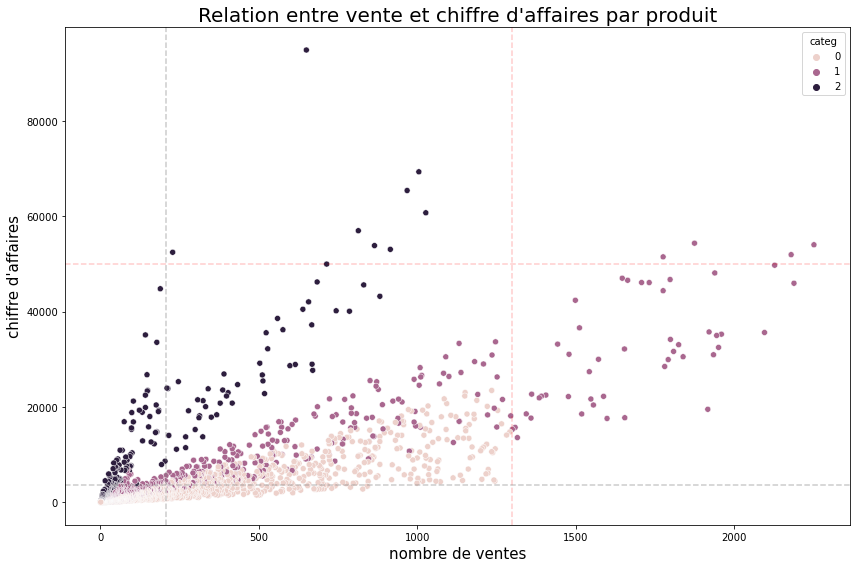

In [122]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='nb_vente', y='CA par prod', data=top1, hue='categ')
plt.axvline(x=208,color='grey',linestyle="--",alpha=0.4)
plt.axvline(x=1300,color='red',linestyle="--",alpha=0.2)
plt.axhline(y=3631,color='grey',linestyle="--",alpha=0.4)
plt.axhline(y=50000,color='red',linestyle="--",alpha=0.2)
plt.xlabel("nombre de ventes", fontsize=15)
plt.ylabel("chiffre d'affaires", fontsize=15)
plt.title("Relation entre vente et chiffre d'affaires par produit", fontsize=20)
plt.tight_layout()

In [123]:
top1.mean()

id_prod                inf
nb_vente        208.001225
price            21.757572
categ             0.370178
CA par prod    3630.226886
dtype: float64

In [124]:
prod_categ = top1.groupby('categ').size()

In [125]:
prod_categ = prod_categ.reset_index()

In [126]:
prod_categ.set_axis(['categ','nb_prod'], axis='columns', inplace=True)

In [127]:
vente_categ = top1.groupby('categ').sum()['nb_vente']

In [128]:
vente_categ = vente_categ.reset_index()

In [129]:
vente_categ.set_axis(['categ','nb_vente'], axis='columns', inplace=True)

In [130]:
CA_categ = top1.groupby('categ').sum()['CA par prod']

In [131]:
CA_categ  = CA_categ.reset_index()

In [132]:
CA_categ.set_axis(['categ','CA'], axis='columns', inplace=True)

In [133]:
CUMUL = pd.merge(prod_categ,vente_categ,on='categ',how='left')

In [134]:
CUMUL1 = pd.merge(CUMUL,CA_categ,on='categ', how='left')

In [135]:
CUMUL1

,categ,nb_prod,nb_vente,CA
0,0,2293,415680,4422323.30
1,1,737,227169,4653722.69
2,2,236,36483,2780275.02


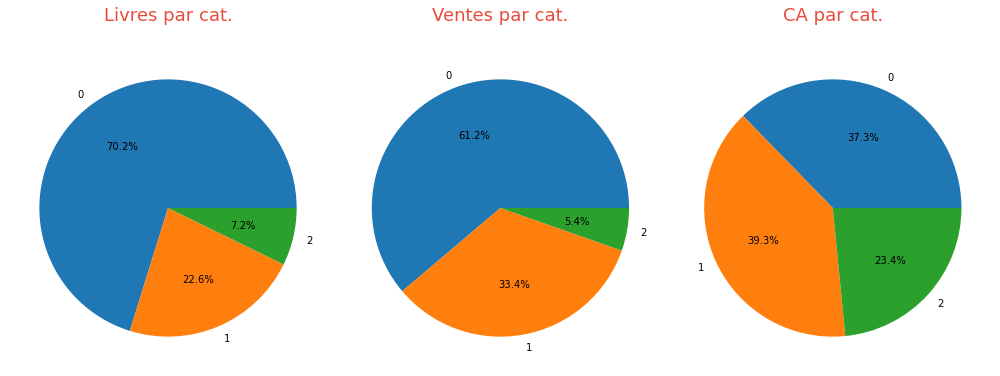

In [136]:
plt.figure(figsize=(14,8))
plt.subplot(1,3,1)
plt.pie(CUMUL1['nb_prod'], labels=CUMUL1['categ'], autopct = lambda x: str(round(x, 1)) + '%')
plt.title("Livres par cat.\n", fontsize=18, color='#e74c3c')
plt.tight_layout()

plt.subplot(1,3,2)
plt.pie(CUMUL1['nb_vente'], labels=CUMUL1['categ'], autopct = lambda x: str(round(x, 1)) + '%')
plt.title("Ventes par cat.\n", fontsize=18, color='#e74c3c')
plt.tight_layout()

plt.subplot(1,3,3)
plt.pie(CUMUL1['CA'], labels=CUMUL1['categ'], autopct = lambda x: str(round(x, 1)) + '%')
plt.title("CA par cat.\n", fontsize=18, color='#e74c3c')
plt.tight_layout()

7 références sur 10 sont de catégorie 0  
Près de 1/3 des ventes sont de cat 1 (alors qu'elle regroupe moins de 1/4 des références)  
Près de 1/4 du CA est généré par la vente de livres de cat 2 (5% des ventes)

## 2.3 Profils des clients

### 2.3.1 Profil général (âge, genre)

In [137]:
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [138]:
nn_clt1 = nn_clt['client_id']

In [139]:
nn_clt1 = nn_clt1.reset_index(drop=True)

In [140]:
nn_clt1

0     c_8253
1     c_3789
2     c_4406
3     c_2706
4     c_3443
5     c_4447
6     c_3017
7     c_4086
8     c_6930
9     c_4358
10    c_8381
11    c_1223
12    c_6862
13    c_5245
14    c_5223
15    c_6735
16     c_862
17    c_7584
18      c_90
19     c_587
20    c_3526
Name: client_id, dtype: object

In [141]:
clt_reels = clients.loc[~clients['client_id'].isin(nn_clt1),:]

In [142]:
clt_reels

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [143]:
clt_reels1 = clt_reels.copy()

def todecade(y): 
    if y < 1940 :
        return '1920-1930'
    elif y < 2000 :
        return '19' + str(y)[2] + '0'
    else :
        return '20' + str(y)[2] + '0'
    
clt_reels1["decade"] = clt_reels1["birth"].apply(todecade)

In [144]:
clt_reels1

,client_id,sex,birth,decade
0,c_4410,f,1967,1960
1,c_7839,f,1975,1970
2,c_1699,f,1984,1980
3,c_5961,f,1962,1960
4,c_5320,m,1943,1940
...,...,...,...,...
8618,c_7920,m,1956,1950
8619,c_7403,f,1970,1970
8620,c_5119,m,1974,1970
8621,c_5643,f,1968,1960


In [145]:
sex = clt_reels1.groupby('sex').size()

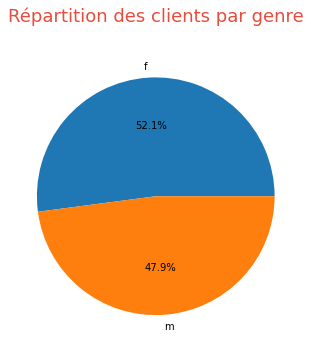

In [146]:
plt.figure(figsize=(9,5))
graph5 = plt.pie(sex, labels=sex.index, autopct = lambda x: str(round(x, 1)) + '%')
plt.title("Répartition des clients par genre\n", fontsize=18, color='#e74c3c')
plt.tight_layout()

La répartition des clients par genre est assez équilibrée (48% d'hommes et 52% de femmes)

In [147]:
ageplus52 = clt_reels1.loc[(clt_reels1['decade'] == '1960') | (clt_reels1['decade'] == '1950') | (clt_reels1['decade'] == '1940') | (clt_reels1['decade'] == '1920-1930'), :]

In [148]:
ageplus52

,client_id,sex,birth,decade
0,c_4410,f,1967,1960
3,c_5961,f,1962,1960
4,c_5320,m,1943,1940
6,c_285,f,1967,1960
12,c_1375,m,1945,1940
...,...,...,...,...
8610,c_938,m,1967,1960
8611,c_1293,m,1953,1950
8614,c_4421,m,1960,1960
8618,c_7920,m,1956,1950


In [149]:
age5232 = clt_reels1.loc[(clt_reels1['decade'] == '1970') | (clt_reels1['decade'] == '1980'), :]

In [150]:
age5232

,client_id,sex,birth,decade
1,c_7839,f,1975,1970
2,c_1699,f,1984,1980
7,c_160,f,1978,1970
8,c_6446,m,1971,1970
10,c_1013,m,1982,1980
...,...,...,...,...
8609,c_8455,m,1972,1970
8612,c_4464,m,1972,1970
8619,c_7403,f,1970,1970
8620,c_5119,m,1974,1970


In [151]:
age3222 = clt_reels1.loc[(clt_reels1['decade'] == '1990'), :]

In [152]:
age22 = clt_reels1.loc[(clt_reels1['decade'] == '2000'), :]

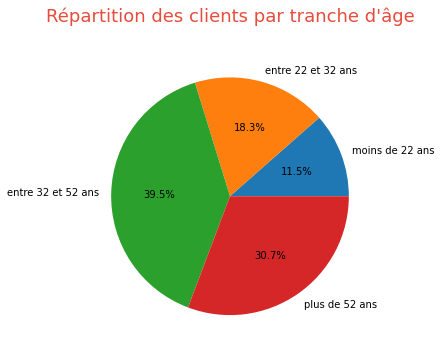

In [153]:
plt.figure(figsize=(9,5))
graph6 = plt.pie([age22['client_id'].count(), age3222['client_id'].count(), age5232['client_id'].count(),ageplus52['client_id'].count()], labels=['moins de 22 ans','entre 22 et 32 ans','entre 32 et 52 ans','plus de 52 ans'], autopct = lambda x: str(round(x, 1)) + '%')
plt.title("Répartition des clients par tranche d'âge\n", fontsize=18, color='#e74c3c')
plt.tight_layout()

In [154]:
clt_reels2 = clt_reels1.groupby(['decade','sex']).size()

In [155]:
clt_reels3 = clt_reels2.copy()

In [156]:
clt_reels4 = clt_reels3.unstack(level=-1)
clt_reels4

sex,f,m
decade,,
1920-1930,76,45
1940,191,156
1950,470,434
1960,657,615
1970,885,798
1980,888,825
1990,803,769
2000,509,479


In [157]:
clt_reels6 = clt_reels4.reset_index()

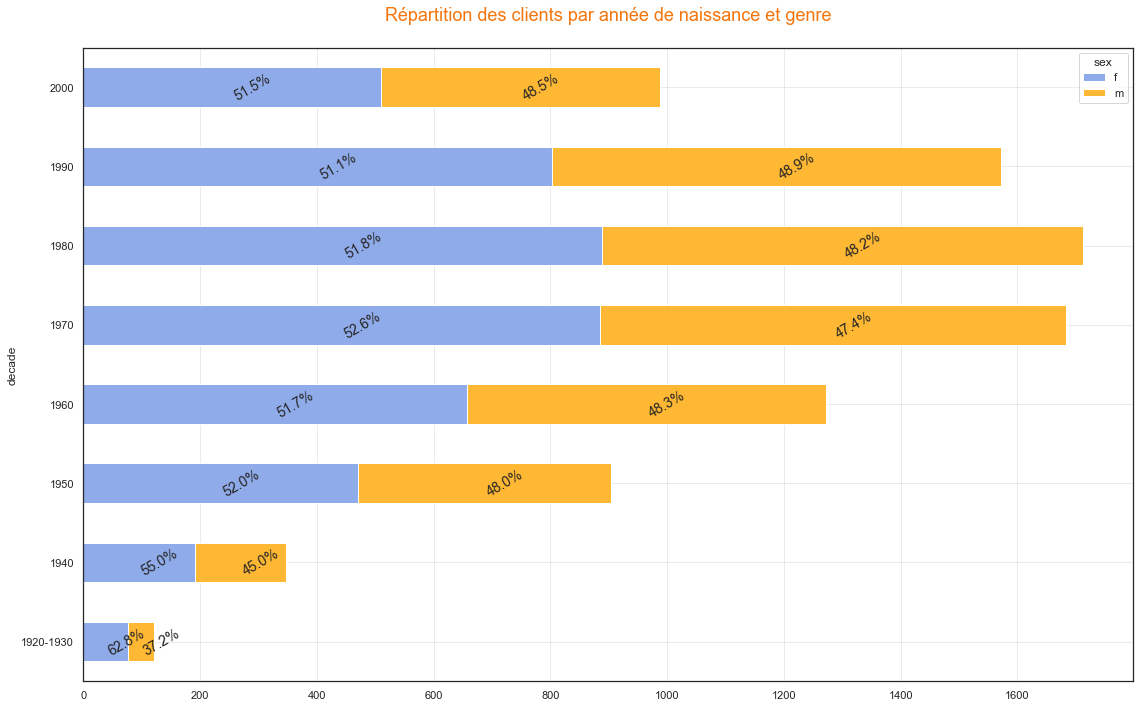

In [158]:
sns.set(style='white',rc = {'figure.figsize':(16,10)})
clt_reels6.plot(x='decade',kind='barh', stacked=True, color=['#8fabe9', '#ffb833'])
plt.title("Répartition des clients par année de naissance et genre\n", fontsize=18, color='#f4750b')
plt.grid(alpha=0.4)
plt.tight_layout()


df_total = clt_reels6["f"] + clt_reels6["m"] 
df_rel = clt_reels6[clt_reels6.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(clt_reels6.iloc[:, 1:].cumsum(1)[n],  
                                         clt_reels6[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'left',rotation = 30, fontsize = 14)

Concernant la répartition f/h, la structure par âge suit la tendance générale, à l'exception des clients les plus âgés (années 1920 à 1940)

### 2.3.2 Tendances au regard des ventes

**Chiffre d'affaires et tranches d'âge**

In [159]:
commun5 = commun4.copy()

In [160]:
commun5["decade"] = commun5["birth"].apply(todecade)

In [161]:
commun5

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year,decade
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05,1980
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07,1980
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08,1980
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06,1980
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08,1980
...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07,2000
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03,1960
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09,1960
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03,1990


In [162]:
def age(y): 
    if y <= 1969 :
        return '+ de 52 ans'
    elif y <= 1989 :
        return 'entre 32 et 52 ans'
    elif y <= 1999 :
        return 'entre 22 et 32 ans'
    else :
        return '- de 22 ans'
    
commun5["age"] = commun5["birth"].apply(age)

In [163]:
commun5

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year,decade,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05,1980,entre 32 et 52 ans
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07,1980,entre 32 et 52 ans
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08,1980,entre 32 et 52 ans
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06,1980,entre 32 et 52 ans
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08,1980,entre 32 et 52 ans
...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07,2000,- de 22 ans
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03,1960,+ de 52 ans
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09,1960,+ de 52 ans
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03,1990,entre 22 et 32 ans


In [164]:
CA_age = commun5.groupby('age').sum()['price']

In [165]:
CA_decade = commun5.groupby('decade').sum()['price']

In [166]:
CA_decade1=CA_decade.reset_index()
CA_decade1

,decade,price
0,1920-1930,102177.06
1,1940,313892.24
2,1950,829994.32
3,1960,1462876.56
4,1970,2393800.56
5,1980,2997029.68
6,1990,2441599.44
7,2000,1314951.15


Les clients nés dans les années 1980 génèrent le CA le plus élevé (près de 3 000 000 €)

In [167]:
commun5.groupby('age').sum()['price']

age
+ de 52 ans           2708940.18
- de 22 ans           1314951.15
entre 22 et 32 ans    2441599.44
entre 32 et 52 ans    5390830.24
Name: price, dtype: float64

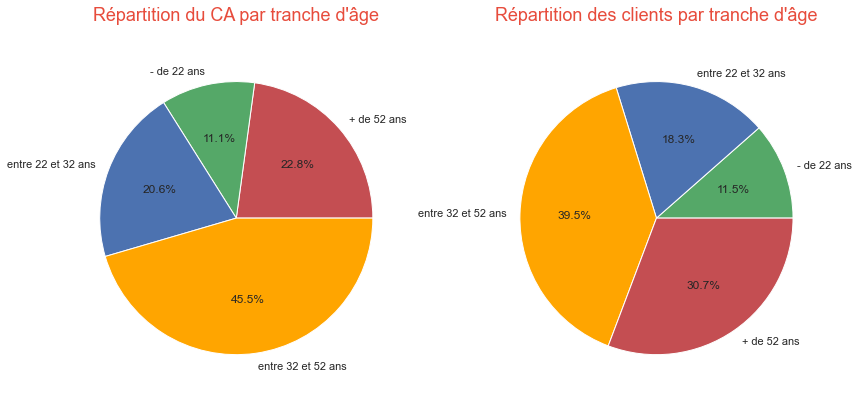

In [168]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
graph7 = plt.pie(commun5.groupby('age').sum()['price'], labels = ['+ de 52 ans','- de 22 ans','entre 22 et 32 ans','entre 32 et 52 ans'],autopct = lambda x: str(round(x, 1)) + '%',colors=['r','g','b','orange'])
plt.title("Répartition du CA par tranche d'âge\n", fontsize=18, color='#e74c3c')
plt.tight_layout()

plt.subplot(1,2,2)
graph6 = plt.pie([age22['client_id'].count(), age3222['client_id'].count(), age5232['client_id'].count(),ageplus52['client_id'].count()], labels=['- de 22 ans','entre 22 et 32 ans','entre 32 et 52 ans','+ de 52 ans'], autopct = lambda x: str(round(x, 1)) + '%',colors=['g','b','orange','r'])
plt.title("Répartition des clients par tranche d'âge\n", fontsize=18, color='#e74c3c')
plt.tight_layout()

Plus de 45% du CA est généré par la tranche 32-52 ans (40% des clients)

Seulement 23% du CA est généré par les + de 52 ans (plus de 30% des clients)

In [169]:
commun6 = commun5.groupby(['age','session_id']).sum()['price']

In [170]:
commun7 = commun6.reset_index()

In [171]:
commun7

,age,session_id,price
0,+ de 52 ans,s_1,11.99
1,+ de 52 ans,s_100005,4.99
2,+ de 52 ans,s_100012,21.44
3,+ de 52 ans,s_10003,26.68
4,+ de 52 ans,s_100030,11.03
...,...,...,...
342310,entre 32 et 52 ans,s_99992,7.99
342311,entre 32 et 52 ans,s_99994,28.92
342312,entre 32 et 52 ans,s_99996,56.27
342313,entre 32 et 52 ans,s_99997,6.99


In [172]:
panier_session = commun7.groupby('age').mean()['price']

In [173]:
panier_session1 = panier_session.reset_index()

In [174]:
nb_ventes_age = commun5.groupby('age').size()

In [175]:
nb_ventes_age1 = nb_ventes_age.reset_index()

In [176]:
nb_ventes_client = commun5.groupby(['age','client_id']).size()

In [177]:
nb_ventes_client1 = nb_ventes_client.reset_index()

In [178]:
nb_ventes_client1['compteur'] = 1

In [179]:
nb_clts = nb_ventes_client1.groupby('age').sum()['compteur']

In [180]:
nb_clts1 = nb_clts.reset_index()

In [181]:
nb_clts1

,age,compteur
0,+ de 52 ans,2644
1,- de 22 ans,988
2,entre 22 et 32 ans,1572
3,entre 32 et 52 ans,3396


In [182]:
panier_clts = pd.merge(nb_clts1,nb_ventes_age1, on='age', how='left')

In [183]:
panier_clts1 = pd.merge(panier_clts, panier_session1,on='age', how='left')

In [184]:
panier_clts1

,age,compteur,0,price
0,+ de 52 ans,2644,161554,24.992067
1,- de 22 ans,988,32774,70.631742
2,entre 22 et 32 ans,1572,81823,58.035213
3,entre 32 et 52 ans,3396,403181,31.118598


In [185]:
panier_clts1.columns = ['age','nb clt','nb livre','panier moyen par session']

In [186]:
panier_clts1['nb livres par clt'] = panier_clts1['nb livre'] / panier_clts1['nb clt']

In [187]:
panier_clts1

,age,nb clt,nb livre,panier moyen par session,nb livres par clt
0,+ de 52 ans,2644,161554,24.992067,61.102118
1,- de 22 ans,988,32774,70.631742,33.172065
2,entre 22 et 32 ans,1572,81823,58.035213,52.050254
3,entre 32 et 52 ans,3396,403181,31.118598,118.722320


In [188]:
panier_clts2 = panier_clts1.sort_values(by='panier moyen par session',ascending=False)

In [189]:
panier_clts3 = panier_clts2[['age','panier moyen par session','nb livres par clt']]

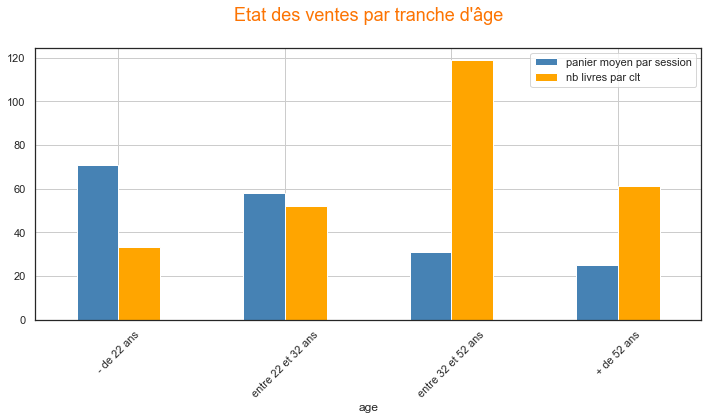

In [190]:
sns.set(style='white',rc = {'figure.figsize':(10,6)})
panier_clts3.plot(x='age',kind='bar', color=['steelblue','orange'])
plt.title("Etat des ventes par tranche d'âge\n", fontsize=18, color='#fc7403')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

La catégorie - 22 ans a un panier moyen par session plus de 2 fois plus élevé que la tranche 32-52 et + de 52 ans.  
La catégorie 32-52 ans achète près du double de livres par rapport aux autres tranches d'âge

**Chiffre d'affaires et clients**

In [191]:
CA_clt = commun5.groupby('client_id').sum()['price']

In [192]:
CA_clt1 = CA_clt.reset_index()

In [193]:
CA_clt2 = CA_clt1.sort_values(by='price')
CA_clt2

,client_id,price
8151,c_8351,6.31
7918,c_8140,8.30
7889,c_8114,9.98
1556,c_240,11.06
4044,c_4648,11.20
...,...,...
2513,c_3263,5276.87
2724,c_3454,113673.12
6337,c_6714,153669.30
4388,c_4958,289760.34


In [194]:
CA_clt2['Ct']= np.arange(1,len(CA_clt2)+1)

In [195]:
CA_clt2

,client_id,price,Ct
8151,c_8351,6.31,1
7918,c_8140,8.30,2
7889,c_8114,9.98,3
1556,c_240,11.06,4
4044,c_4648,11.20,5
...,...,...,...
2513,c_3263,5276.87,8596
2724,c_3454,113673.12,8597
6337,c_6714,153669.30,8598
4388,c_4958,289760.34,8599


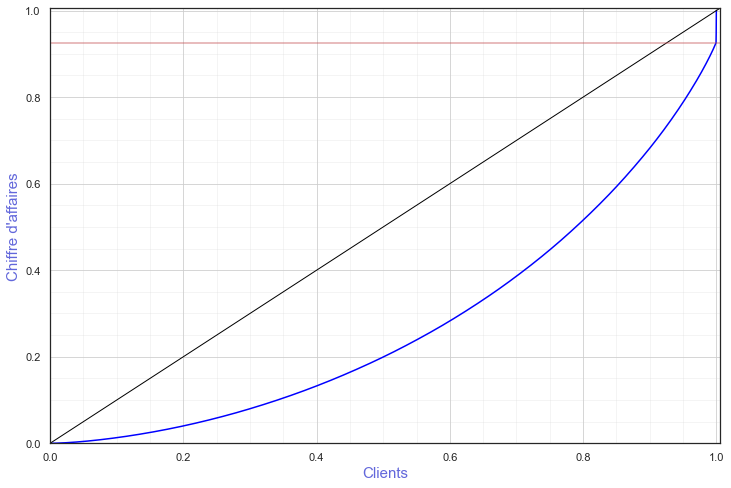

In [196]:
x1 = CA_clt2['Ct']
y1 = CA_clt2['price'].cumsum() 

plt.figure(figsize=(12,8))
plt.plot(x1/max(x1),y1/max(y1),'blue', label='M')
plt.axline((0, 0), (1, 1), linewidth=1, color='black')
plt.axhline(1 - (CA_clt2.loc[CA_clt2['price'] > 6000, :].sum()['price']) / CA_clt2['price'].sum(),alpha=0.5, color= 'r')
plt.gca().set_xlim(0, 1.005)
plt.gca().set_ylim(0, 1.005)
plt.xlabel("Clients", fontsize=15, color='#6267db')
plt.ylabel("Chiffre d'affaires", fontsize=15, color='#6267db')
plt.grid(True, which='minor', alpha=0.2)
plt.grid(True, which='major', alpha=0.8)
plt.minorticks_on()
plt.show()

20% des clients génèrent la moitié du chiffre d'affaires

50% des clients génèrent 80% du chiffre d'affaires

**Quelques chiffres pour les clients professionnels**

In [197]:
(CA_clt2.loc[CA_clt2['price'] > 6000, :].sum()['price']) / CA_clt2['price'].sum() * 100

7.431783512413519

Les 4 meilleurs clients génèrent 7,4 % du chiffre d'affaires total (0.05% des clients). Ce chiffre d'affaires élevé (+ de 110 000 € par client) fait référence à des clients professionnels. Le CA associé au 5e meilleur client est seulement de 5276€.

In [198]:
CA_clt2['z price'] = np.abs(stats.zscore(CA_clt2['price']))
CA_clt2.sort_values(by='z price', ascending=False)

,client_id,price,Ct,z price
677,c_1609,324033.35,8600,62.257132
4388,c_4958,289760.34,8599,55.644058
6337,c_6714,153669.30,8598,29.384910
2724,c_3454,113673.12,8597,21.667535
2513,c_3263,5276.87,8596,0.752174
...,...,...,...,...
6378,c_6752,1378.24,5467,0.000078
410,c_1369,1378.29,5468,0.000068
2455,c_3210,1378.30,5469,0.000066
1876,c_2689,1378.94,5471,0.000058


Confirmation des valeurs atypiques par le score z : le score z des chiffres d'affaires des 4 clients pro. est supérieur à 20.

In [199]:
commun8 = commun5.groupby(['client_id','session_id']).sum()['price']

In [200]:
commun9 = commun8.reset_index()

In [201]:
commun9

,client_id,session_id,price
0,c_1,s_105105,7.99
1,c_1,s_114737,92.62
2,c_1,s_120172,44.29
3,c_1,s_134971,10.30
4,c_1,s_136532,13.78
...,...,...,...
342310,c_999,s_88239,15.99
342311,c_999,s_89648,5.99
342312,c_999,s_92374,8.57
342313,c_999,s_98289,11.99


In [202]:
cltpro = ['c_3454','c_6714','c_4958','c_1609']

In [203]:
nb_session_clt = commun9.groupby('client_id').count()['session_id']

In [204]:
nb_session_clt1 = nb_session_clt.reset_index()

In [205]:
nb_session_clt1['session_id'].mean()

39.80406976744186

In [206]:
(nb_session_clt1.loc[nb_session_clt1['client_id'].isin(cltpro)])['session_id'].mean()

5760.25

Le nombre de session d'achat des clients professionnels est largement plus élevé que la moyenne (5760 contre 40)

In [207]:
panier_session_clt = commun9.groupby('client_id').mean()['price']

In [208]:
panier_session_clt1 = panier_session_clt.reset_index()

In [209]:
panier_session_clt1['price'].mean()

40.383301862500936

In [210]:
(panier_session_clt1.loc[panier_session_clt1['client_id'].isin(cltpro)])['price'].mean()

45.9395037393579

Le panier moyen par session des clients professionnels est similaire à la moyenne des clients (46 € contre 40 €)

L'activité des clients pro se distingue plus par le nombre de session d'achat que par le panier moyen par session.

# 3. Analyses bivariées et tests statistiques

## 3.1 Lien entre le genre d’un client et les catégories des livres achetés

H0 : Le genre du client et la catégorie des livres achetés sont indépendants

Je vais utiliser le test d'indépendance du khi-2

Nous avons les éléments suivants :  
  
 . Des valeurs qui constituent un échantillon aléatoire simple issu de la population visée.  
 . Deux variables catégorielles ou nominales.  
 . Pour chaque combinaison des niveaux des deux variables, nous avons au moins cinq valeurs attendues.

### 3.1.1 Tableau de contingence et heatmap

In [211]:
X = "sex"
Y = "categ"

cont = commun5[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


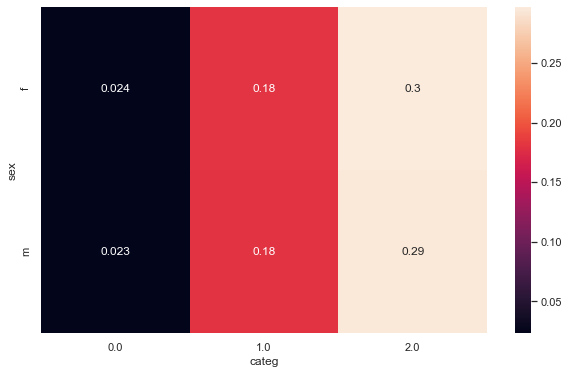

In [317]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(commun5)
indep = tx.dot(ty) / n

measure1 = (cont-indep)**2/indep
xi_nn = measure1.sum().sum()
table1 = measure1/xi_nn
sns.heatmap(table1.iloc[:-1,:-1],annot=True)
plt.show()

In [318]:
indep

categ,0.0,1.0,2.0,Total
sex,,,,
f,207066.564449,113161.817694,18173.617857,338402.0
m,208613.435551,114007.182306,18309.382143,340930.0
Total,415680.000000,227169.000000,36483.000000,679332.0


In [319]:
measure1

categ,0.0,1.0,2.0,Total
sex,,,,
f,3.461068,26.668027,43.645694,0.0
m,3.435404,26.470283,43.322061,0.0
Total,0.000000,0.000000,0.000000,0.0


Ces valeurs sont des contributions à la non-indépendance. Plus elles sont élevées, plus elles sont source de non-indépendance. Ici, les valeurs correspondant à la catégorie 2 contribuent le plus à la non-indépendance.

### 3.1.2 Comparaison à la distribution khi-2

**Valeur du khi-2 xi_nn**

In [320]:
xi_nn

147.00253568681114

**Fixation du seuil**

*Rappel : H0 = Le genre du client et la catégorie des livres achetés sont indépendants*

Nous décidons du risque que nous sommes disposés à prendre de conclure que les deux variables ne sont pas indépendantes alors qu'elles le sont en réalité. Définissons le seuil de significativité α à 0,05.

**Degré de liberté (dll)**

ddl = (Nombre de lignes – 1) x (Nombre de colonnes – 1) 

In [214]:
dll = (2-1) * (3-1)
dll

2

La valeur khi-deux avec α = 0,05 et deux degrés de liberté est de 5,99.

Dans notre cas, 147,003 > 5,99

Notre statistique de test est plus élevée que la valeur du khi-deux. L'hypothèse d'indépendance est donc rejetée. Nous ne pouvons pas maintenir l'hypothèse selon laquelle le genre du client n'a aucun lien avec le fait d'acheter une certaine catégorie de livre.

### 3.1.2 Calcul direct de la p value

In [215]:
stats.chi2_contingency(cont.iloc[:-1,:-1])

(147.00253568681114,
 1.1989607410166063e-32,
 2,
 array([[207066.56444861, 113161.81769444,  18173.61785695],
        [208613.43555139, 114007.18230556,  18309.38214305]]))

La p value est inférieure à 0.05 et très proche de 0. L'hypothèse H0 est donc rejetée et nous pouvons conclure sur une non-indépendance des variables 'genre du client' et 'catégorie de livre'

## 3.2 Corrélations avec l'âge d’un client

###  3.2.1 Lien entre l'âge d'un client et le montant total des achats

In [216]:
commun5

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year,decade,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05,1980,entre 32 et 52 ans
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07,1980,entre 32 et 52 ans
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08,1980,entre 32 et 52 ans
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06,1980,entre 32 et 52 ans
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08,1980,entre 32 et 52 ans
...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07,2000,- de 22 ans
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03,1960,+ de 52 ans
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09,1960,+ de 52 ans
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03,1990,entre 22 et 32 ans


In [217]:
CA_birth = commun5.groupby('birth').sum()['price']
CA_birth1 = CA_birth.reset_index()

In [218]:
CA_birth1

,birth,price
0,1929,3221.85
1,1930,4013.87
2,1931,2815.45
3,1932,5043.19
4,1933,5266.08
...,...,...
71,2000,165031.44
72,2001,178497.70
73,2002,184212.54
74,2003,178195.78


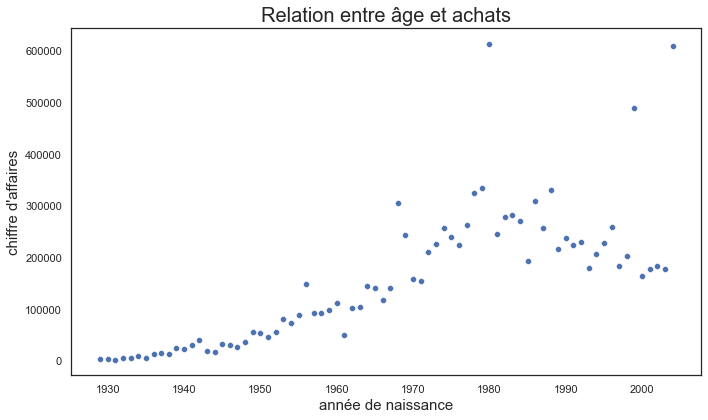

In [219]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='birth', y='price', data=CA_birth1)
plt.xlabel("année de naissance", fontsize=15)
plt.ylabel("chiffre d'affaires", fontsize=15)
plt.title("Relation entre âge et achats", fontsize=20)
plt.tight_layout()

**Calcul du coefficient de correlation linéaire - Pearson**

Ce coefficient étant peu robuste aux outliers, je décide d'écarter les clients professionnels de mon analyse.

In [220]:
particuliers = commun5.loc[~commun5['client_id'].isin(cltpro), :]
particuliers

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year,decade,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05,1980,entre 32 et 52 ans
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07,1980,entre 32 et 52 ans
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08,1980,entre 32 et 52 ans
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06,1980,entre 32 et 52 ans
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08,1980,entre 32 et 52 ans
...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07,2000,- de 22 ans
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03,1960,+ de 52 ans
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09,1960,+ de 52 ans
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03,1990,entre 22 et 32 ans


In [221]:
CA_birth4 = particuliers.groupby(['birth']).sum()['price']
CA_birth5 = CA_birth4.reset_index()

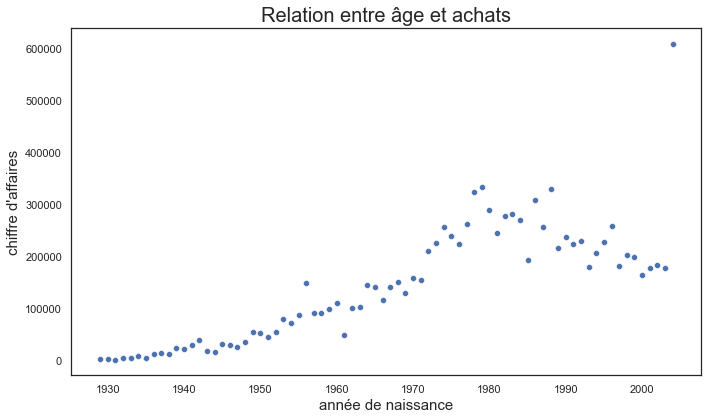

In [222]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='birth', y='price', data=CA_birth5)
plt.xlabel("année de naissance", fontsize=15)
plt.ylabel("chiffre d'affaires", fontsize=15)
plt.title("Relation entre âge et achats", fontsize=20)
plt.tight_layout()

In [223]:
(stats.pearsonr(CA_birth5['birth'], CA_birth5['price'])[0])

0.830593443364213

Suivant le coefficient de corrélation de Pearson (= 0.83), il existe une certaine corrélation entre les variables 'âge' et 'montant total des achats'

Cependant, le coefficient de Pearson est en principe seulement applicable lorsque la distribution des variables suit une loi normale. L'emploi de ce coefficient peut générer des limites d'interprétation sur des distributions non gaussiennes.

*Test de normalité shapiro*

In [224]:
stats.shapiro(CA_birth5['price'])

ShapiroResult(statistic=0.9117365479469299, pvalue=6.0526359447976574e-05)

La valeur p est inférieure à 0,05.La distribution des données est donc significativement différente de la distribution normale.

*Coefficient de Spearman*

Afin de compléter notre analyse, je choisis de calculer le coefficient de Spearman, qui permet d'analyser les relations monotones (forme curviligne par exemple). C'est un test non paramétrique qui ne se base pas sur une distribution statistique particulière. Il peut être également préférable lorsque les valeurs comportent des outliers.

In [225]:
(stats.spearmanr(CA_birth5['birth'], CA_birth5['price'])[0])

0.8736842105263158

Le résultat du coefficient de Spearman confirme l'analyse du coefficient de Pearson

Cependant, constatons que l'année 2004 est également a un montant total des achats largement plus élevé que les autres années. Cela est du au nombre élevé de clients nés lors de cette année.

In [226]:
(commun5.groupby(['birth','client_id']).size()).groupby('birth').size()

birth
1929      3
1930      4
1931      4
1932      6
1933      8
       ... 
2000    136
2001    125
2002    145
2003    145
2004    437
Length: 76, dtype: int64

In [227]:
CA_birth6 = CA_birth5.loc[CA_birth5['birth'] < 2004 , :]

In [228]:
(stats.pearsonr(CA_birth6['birth'], CA_birth6['price'])[0])

0.8552321737494826

In [229]:
(stats.spearmanr(CA_birth6['birth'], CA_birth6['price'])[0])

0.8685633001422475

En écartant l'année 2004, les coefficients de Pearson et Spearman restent similaires

**Modèle de régression linéaire**

In [230]:
CA_birth6

,birth,price
0,1929,3221.85
1,1930,4013.87
2,1931,2815.45
3,1932,5043.19
4,1933,5266.08
...,...,...
70,1999,199737.20
71,2000,165031.44
72,2001,178497.70
73,2002,184212.54


In [231]:
Y = CA_birth6['price']
X = CA_birth6[['birth']]
X = X.copy()
X['intercept'] = 1.
result = smi.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['birth'],result.params['intercept']
print(a,b)

3913.007234708397 -7554756.607303379


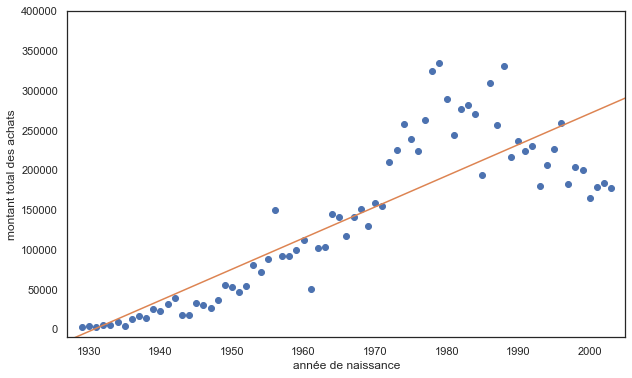

In [232]:
plt.plot(CA_birth6.birth,CA_birth6.price, "o")
plt.plot(np.arange(2010),[a*xn+b for xn in np.arange(2010)])
plt.gca().set_xlim(1927, 2005)
plt.gca().set_ylim(-10000, 400000)
plt.xlabel("année de naissance")
plt.ylabel("montant total des achats")
plt.show()

In [233]:
a

3913.007234708397

In [234]:
b

-7554756.607303379

**Annexe : analyse périodique**

In [235]:
birthavt_1971 = CA_birth6.loc[CA_birth6['birth'] < 1972, :]
(stats.pearsonr(birthavt_1971['birth'], birthavt_1971['price'])[0])

0.9365355270982126

In [236]:
(stats.spearmanr(birthavt_1971['birth'], birthavt_1971['price'])[0])

0.9631531259438236

Pour les clients nés avant 1972, la correlation est importante entre les variables 'âge' et 'montant total des achats'

In [237]:
birthap_1971 = CA_birth6.loc[CA_birth6['birth'] > 1971, :]
(stats.pearsonr(birthap_1971['birth'], birthap_1971['price'])[0])

-0.5571422769236792

In [238]:
(stats.spearmanr(birthap_1971['birth'], birthap_1971['price'])[0])

-0.6041055718475072

Pour les clients après 1971, la correlation est beaucoup moins évidente

In [239]:
YY = birthavt_1971['price']
XX = birthavt_1971[['birth']]
XX = XX.copy()
XX['intercept'] = 1.
result1 = smi.OLS(YY, XX).fit()
aa,bb = result1.params['birth'],result1.params['intercept']
print(aa,bb)

3869.5725958924727 -7481591.244083345


In [240]:
YYY = birthap_1971['price']
XXX = birthap_1971[['birth']]
XXX = XXX.copy()
XXX['intercept'] = 1.
result2 = smi.OLS(YYY, XXX).fit()
aaa,bbb = result2.params['birth'],result2.params['intercept']
print(aaa,bbb)

-2798.1438123167954 5799152.468854633


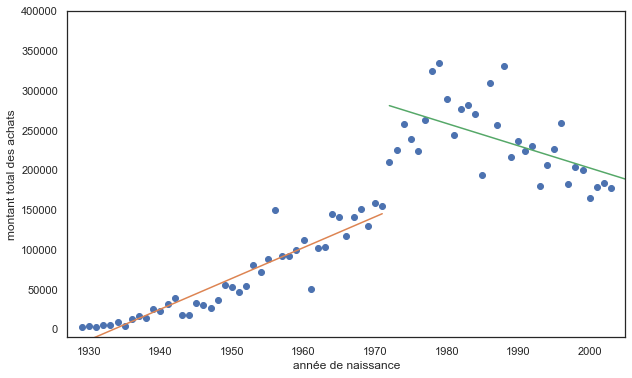

In [241]:
plt.plot(CA_birth6.birth,CA_birth6.price, "o")
plt.plot(np.arange(1927,1972),[aa*xnn+bb for xnn in np.arange(1927,1972)])
plt.plot(np.arange(1972,2010),[aaa*xnnn+bbb for xnnn in np.arange(1972,2010)])
plt.gca().set_xlim(1927, 2005)
plt.gca().set_ylim(-10000, 400000)
plt.xlabel("année de naissance")
plt.ylabel("montant total des achats")
plt.show()

### 3.2.2 Lien entre l'âge d'un client et la fréquence d’achat

**Calcul de la fréquence d'achat et représentation graphique**

In [242]:
sess = (particuliers.groupby(['birth','session_id']).size()).groupby('birth').size()
sess

birth
1929     134
1930     146
1931      96
1932     206
1933     234
        ... 
2000    2421
2001    2431
2002    2604
2003    2567
2004    8594
Length: 76, dtype: int64

In [243]:
cltss = (particuliers.groupby(['birth','client_id']).size()).groupby('birth').size()
cltss

birth
1929      3
1930      4
1931      4
1932      6
1933      8
       ... 
2000    136
2001    125
2002    145
2003    145
2004    437
Length: 76, dtype: int64

In [244]:
freq_clt = pd.DataFrame({"nb_clt":cltss, "nb_commandes":sess})

In [245]:
freq_clt1 = freq_clt.reset_index()

In [246]:
freq_clt1['freq_achat'] = freq_clt1['nb_commandes'] / freq_clt1['nb_clt']

In [247]:
freq_clt1

,birth,nb_clt,nb_commandes,freq_achat
0,1929,3,134,44.666667
1,1930,4,146,36.500000
2,1931,4,96,24.000000
3,1932,6,206,34.333333
4,1933,8,234,29.250000
...,...,...,...,...
71,2000,136,2421,17.801471
72,2001,125,2431,19.448000
73,2002,145,2604,17.958621
74,2003,145,2567,17.703448


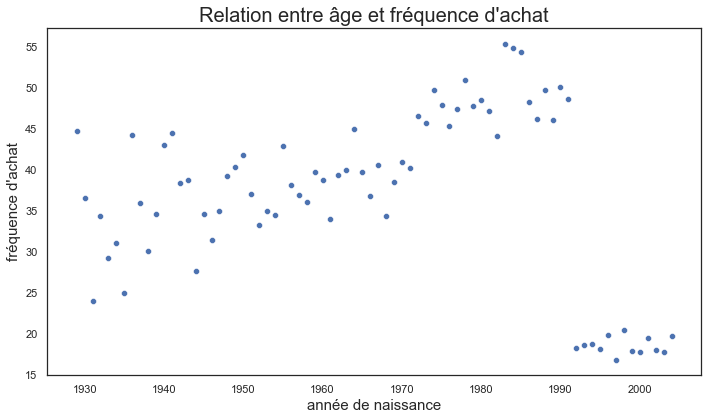

In [248]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='birth', y='freq_achat', data=freq_clt1)
plt.xlabel("année de naissance", fontsize=15)
plt.ylabel("fréquence d'achat", fontsize=15)
plt.title("Relation entre âge et fréquence d'achat", fontsize=20)
plt.tight_layout()

**Calculs des coefficients de Pearson et de Spearman**

In [249]:
(stats.pearsonr(freq_clt1['birth'], freq_clt1['freq_achat'])[0])

-0.1666573426624128

In [250]:
(stats.spearmanr(freq_clt1['birth'], freq_clt1['freq_achat'])[0])

0.0052494873547505125

A la lecture de ce coefficient, il semble y avoir très peu de correlation entre l'âge et la fréquence d'achat

In [251]:
birth_avt92 = freq_clt1.loc[freq_clt1['birth'] < 1992,:]

In [252]:
(stats.pearsonr(birth_avt92['birth'],birth_avt92['freq_achat'])[0])

0.7528411088151095

In [253]:
(stats.spearmanr(birth_avt92['birth'],birth_avt92['freq_achat'])[0])

0.7573924731182796

Pour les clients nés avant 1992, il existe cependant une correlation entre âge et fréquence d'achat

In [254]:
Y1 = birth_avt92['freq_achat']
X1 = birth_avt92[['birth']]
X1 = X1.copy()
X1['intercept'] = 1.
result3 = smi.OLS(Y1, X1).fit()
a1,b1 = result3.params['birth'],result3.params['intercept']
print(a1,b1)

0.2933335674898304 -534.2965059231454


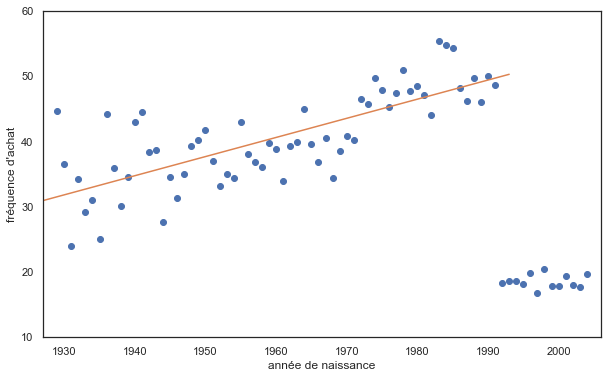

In [255]:
plt.plot(freq_clt1.birth,freq_clt1.freq_achat, "o")
plt.plot(np.arange(1994),[a1*x1+b1 for x1 in np.arange(1994)])
plt.gca().set_xlim(1927, 2006)
plt.gca().set_ylim(10, 60)
plt.xlabel("année de naissance")
plt.ylabel("fréquence d'achat")
plt.show()

In [256]:
birth_ap92 = freq_clt1.loc[freq_clt1['birth'] > 1991,:]

In [257]:
(stats.pearsonr(birth_ap92['birth'],birth_ap92['freq_achat'])[0])

0.04027304232771517

In [258]:
(stats.spearmanr(birth_ap92['birth'],birth_ap92['freq_achat'])[0])

-0.13736263736263735

Pas de corrélation entre âge et fréquence d'achat pour les clients nés après 1991

In [259]:
birth_ap92['freq_achat'].mean()

18.566079518068943

La fréquence d'achat moyenne est de 18,57 commandes par client pour les clients nés après 1991.

### 3.2.3 Lien entre l'âge d'un client et la taille du panier moyen

#### 3.2.3.1 Calcul de la taille de panier moyen par âge et représentation graphique

In [260]:
panier_moy = (particuliers.groupby(['birth','session_id']).sum()['price']).groupby('birth').mean()

In [261]:
panier_moy1 = panier_moy.reset_index()

In [262]:
panier_moy1

,birth,price
0,1929,24.043657
1,1930,27.492260
2,1931,29.327604
3,1932,24.481505
4,1933,22.504615
...,...,...
71,2000,68.166642
72,2001,73.425627
73,2002,70.742143
74,2003,69.417912


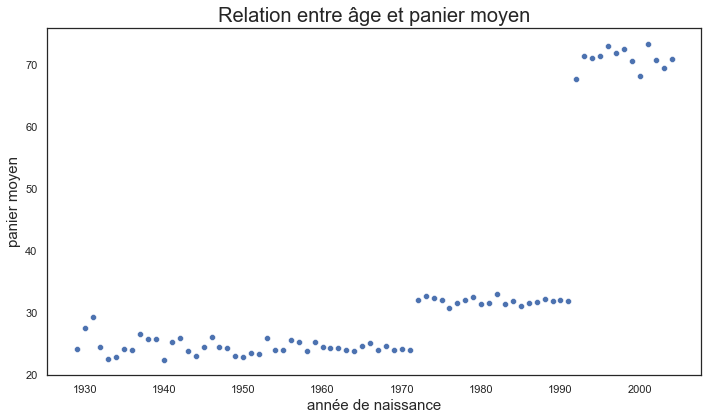

In [263]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='birth', y='price', data=panier_moy1)
plt.xlabel("année de naissance", fontsize=15)
plt.ylabel("panier moyen", fontsize=15)
plt.title("Relation entre âge et panier moyen", fontsize=20)
plt.tight_layout()

In [264]:
(stats.pearsonr(panier_moy1['birth'],panier_moy1['price'])[0])

0.7457912688274486

In [265]:
(stats.spearmanr(panier_moy1['birth'],panier_moy1['price'])[0])

0.7660697197539303

Il semble exister une correlation entre l'âge et le panier moyen. Cependant, à la lecture du graphique, nous pouvons constater que cette correlation se considère davantage par tranches d'âge.

#### 3.2.3.2 Discrétisation de la variable 'birth'

In [266]:
particuliers1 = particuliers.copy()

In [267]:
def birthclass(y): 
    if y <= 1951 :
        return '1929-1951'
    elif y <= 1971 :
        return '1952-1971'
    elif y <= 1991 :
        return '1972-1991'
    else :
        return '1992-2004'
    
particuliers1["birthclass"] = particuliers1["birth"].apply(birthclass)

In [268]:
particuliers1

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year,decade,age,birthclass
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05,1980,entre 32 et 52 ans,1972-1991
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07,1980,entre 32 et 52 ans,1972-1991
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08,1980,entre 32 et 52 ans,1972-1991
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06,1980,entre 32 et 52 ans,1972-1991
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08,1980,entre 32 et 52 ans,1972-1991
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07,2000,- de 22 ans,1992-2004
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03,1960,+ de 52 ans,1952-1971
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09,1960,+ de 52 ans,1952-1971
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03,1990,entre 22 et 32 ans,1992-2004


In [269]:
panier_moyclass1 = ((particuliers1.groupby(['birthclass','birth','session_id']).sum()['price']).groupby(['birthclass','birth']).mean()).reset_index()

In [270]:
panier_moyclass1

,birthclass,birth,price
0,1929-1951,1929,24.043657
1,1929-1951,1930,27.492260
2,1929-1951,1931,29.327604
3,1929-1951,1932,24.481505
4,1929-1951,1933,22.504615
...,...,...,...
71,1992-2004,2000,68.166642
72,1992-2004,2001,73.425627
73,1992-2004,2002,70.742143
74,1992-2004,2003,69.417912


#### 3.2.3.3. Représentation graphique par classe d'âge

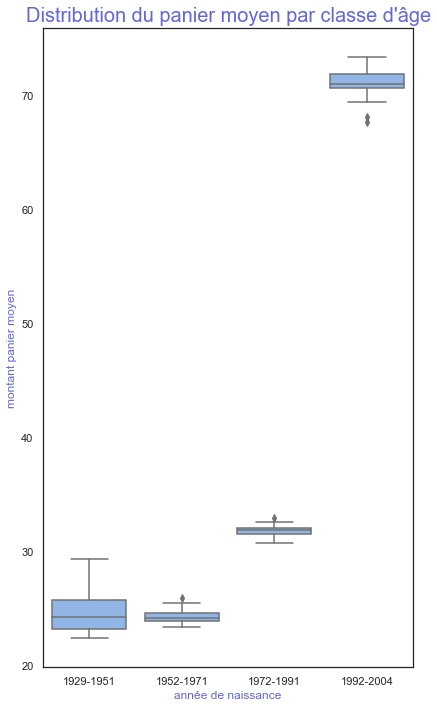

In [271]:
plt.figure(figsize=(6,10))
graph = sns.boxplot(x=panier_moyclass1['birthclass'], y=panier_moyclass1['price'],color='#83b3f3')
plt.xlabel("année de naissance", fontsize=12, color='#6267db')
plt.ylabel("montant panier moyen", fontsize=12, color='#6267db')
plt.title("Distribution du panier moyen par classe d'âge", fontsize=20, color='#6267db')
plt.tight_layout()

#### 3.2.3.4 Test ANOVA

3 conditions pour l’ANOVA :  

1. Les échantillons comparés sont indépendants.
2. La variable quantitative étudiée suit une loi normale.
3. Les populations comparées ont une même variance : Homogénéité des variances ou homoscédasticité.

**Conditions de réalisation ANOVA**

   <ins>Test de l'égalité des variances :</ins>

In [272]:
panier_moyclass1.groupby("birthclass")['price'].agg('var')

birthclass
1929-1951    2.962054
1952-1971    0.452603
1972-1991    0.278075
1992-2004    2.887135
Name: price, dtype: float64

Test de Bartlett :  

    H0 : Les variances de chaque groupe sont égales si p-value > 5%

In [273]:
from scipy.stats import bartlett

In [274]:
bartlett(panier_moyclass1.price[panier_moyclass1.birthclass == '1929-1951'],
        panier_moyclass1.price[panier_moyclass1.birthclass == '1952-1971'],
         panier_moyclass1.price[panier_moyclass1.birthclass == '1972-1991'],
        panier_moyclass1.price[panier_moyclass1.birthclass == '1992-2004'])

BartlettResult(statistic=34.80799085004695, pvalue=1.337516709167048e-07)

L'hypothèse d'égalité des variances est rejetée

In [275]:
stats.levene(panier_moyclass1.price[panier_moyclass1.birthclass == '1929-1951'], 
             panier_moyclass1.price[panier_moyclass1.birthclass == '1952-1971'], 
             panier_moyclass1.price[panier_moyclass1.birthclass == '1972-1991'],
             panier_moyclass1.price[panier_moyclass1.birthclass == '1992-2004'], center='median')

LeveneResult(statistic=5.884118793325037, pvalue=0.0011917750916478778)

In [276]:
stats.levene(panier_moyclass1.price[panier_moyclass1.birthclass == '1929-1951'],
             panier_moyclass1.price[panier_moyclass1.birthclass == '1952-1971'], 
             panier_moyclass1.price[panier_moyclass1.birthclass == '1972-1991'],
             panier_moyclass1.price[panier_moyclass1.birthclass == '1992-2004'], center='mean')

LeveneResult(statistic=7.3293712103630115, pvalue=0.00023500939724906256)

Rejet également de l'égalité des variances avec le test de Levene

<ins>Test de la normalité des résidus</ins> :

H0 = la population est normalement distribuée

In [323]:
from scipy.stats import shapiro
from statsmodels.formula.api import ols

model = ols('price ~ birthclass', data=panier_moyclass1).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.9497736096382141, pvalue=0.004497600253671408)

Alors rejet de H0.

Je recherche donc une autre méthode pour étudier la relation entre les deux variables.

**Test de Kruskal-Wallis**

Le test de Kruskal-Wallis est une méthode non paramétrique, il ne suppose pas une distribution normale des résidus, contrairement à l'analyse de variance à sens unique.

 H0 : toutes les médianes sont égales

In [278]:
stats.kruskal(panier_moyclass1.price[panier_moyclass1.birthclass == '1929-1951'],
              panier_moyclass1.price[panier_moyclass1.birthclass == '1952-1971'],
              panier_moyclass1.price[panier_moyclass1.birthclass == '1972-1991'],
              panier_moyclass1.price[panier_moyclass1.birthclass == '1992-2004'])

KruskalResult(statistic=59.68900264495227, pvalue=6.849933094240075e-13)

La valeur de p étant inférieures au seuil de 0,05, l'hypothèse nulle est rejetée, les médianes ne sont pas égales (au moins une est différente des autres).

Je décide donc d'analyser les relations entre les classes par paires, avec le test de Dunn.

**Test de Dunn**

In [279]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [280]:
import scikit_posthocs as sp

In [281]:
sp.posthoc_dunn([panier_moyclass1.price[panier_moyclass1.birthclass == '1929-1951'],
              panier_moyclass1.price[panier_moyclass1.birthclass == '1952-1971'],
              panier_moyclass1.price[panier_moyclass1.birthclass == '1972-1991'],
              panier_moyclass1.price[panier_moyclass1.birthclass == '1992-2004']])

,1,2,3,4
1,1.000000e+00,9.448104e-01,0.000004,4.494550e-10
2,9.448104e-01,1.000000e+00,0.000005,8.629444e-10
3,3.599623e-06,5.453182e-06,1.000000,3.597063e-02
4,4.494550e-10,8.629444e-10,0.035971,1.000000e+00


Seuls les groupes 1929-1951 et 1952-1971 ont statistiquement peu de différence significative (p = 0.94)

Les autres relations se caractérisent par p < 0.05

**Passage au log**

Afin de pouvoir utiliser le test paramétrique ANOVA, essayons de rectifier les données en effectuant une transformation logarithmique.

In [282]:
panier_moyclass1['logprice'] = np.log(panier_moyclass1['price'])
panier_moyclass1

,birthclass,birth,price,logprice
0,1929-1951,1929,24.043657,3.179871
1,1929-1951,1930,27.492260,3.313905
2,1929-1951,1931,29.327604,3.378529
3,1929-1951,1932,24.481505,3.197918
4,1929-1951,1933,22.504615,3.113720
...,...,...,...,...
71,1992-2004,2000,68.166642,4.221955
72,1992-2004,2001,73.425627,4.296273
73,1992-2004,2002,70.742143,4.259041
74,1992-2004,2003,69.417912,4.240145


*Test de l'homogénéité des variances*

In [283]:
panier_moyclass1.groupby("birthclass")['logprice'].agg('var')

birthclass
1929-1951    0.004642
1952-1971    0.000747
1972-1991    0.000274
1992-2004    0.000581
Name: logprice, dtype: float64

In [284]:
bartlett(panier_moyclass1.logprice[panier_moyclass1.birthclass == '1929-1951'],
         panier_moyclass1.logprice[panier_moyclass1.birthclass == '1952-1971'], 
             panier_moyclass1.logprice[panier_moyclass1.birthclass == '1972-1991'],
             panier_moyclass1.logprice[panier_moyclass1.birthclass == '1992-2004'])

BartlettResult(statistic=43.526157229397924, pvalue=1.902764025911904e-09)

Les variances des quatres classes sont inégales : p < 5%

In [285]:
bartlett(panier_moyclass1.logprice[panier_moyclass1.birthclass == '1952-1971'], 
             panier_moyclass1.logprice[panier_moyclass1.birthclass == '1972-1991'],
             panier_moyclass1.logprice[panier_moyclass1.birthclass == '1992-2004'])

BartlettResult(statistic=4.549203457838599, pvalue=0.10283785762499932)

In [286]:
stats.levene(panier_moyclass1.logprice[panier_moyclass1.birthclass == '1952-1971'], 
             panier_moyclass1.logprice[panier_moyclass1.birthclass == '1972-1991'],
             panier_moyclass1.logprice[panier_moyclass1.birthclass == '1992-2004'],center='mean')

LeveneResult(statistic=2.1342103824038388, pvalue=0.12899429948442814)

Les variances des 3 classes 1952 à 2004 sont égales : p-value > 5%

Je décide donc d'analyser seulement les données des 3 classes présentant une homogénéité des variances

In [287]:
birthclass5204 = panier_moyclass1.loc[(panier_moyclass1['birthclass'] == '1952-1971') | 
                                      (panier_moyclass1['birthclass'] == '1972-1991') |
                                     (panier_moyclass1['birthclass'] == '1992-2004'), :]

*Test de la normalité des résidus*

In [324]:
model = ols('logprice ~ birthclass', data=birthclass5204).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.9817861318588257, pvalue=0.5920435786247253)

Alors normalité des résidus pour les classes de 1952 à 2004

In [325]:
model = ols('logprice ~ birthclass', data=panier_moyclass1).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.9192528128623962, pvalue=0.00013135884364601225)

**Test ANOVA**

H0 = Les moyennes par classe d'âge des paniers moyens sont égales

*Calcul du rapport de corrélation éta carré*

In [290]:
X1 = "birthclass" # qualitative
Y1 = "logprice" # quantitative

data1 = birthclass5204

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data1[X1],data1[Y1])

0.9971691731277695

Pour complément, calcul d'éta carré pour les 4 classes :

In [291]:
X = "birthclass" # qualitative
Y = "price" # quantitative

data = panier_moyclass1

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data[X],data[Y])

0.994792491897228

eta carré étant très proche de 1, les moyennes de panier par classes d'âge sont très différentes. Il existe donc à priori une relation entre les variables 'taille de panier moyen' et 'classes d'âge'

*Calcul de la p value*

In [292]:
from scipy.stats import f_oneway
b1 = birthclass5204.logprice[birthclass5204.birthclass == '1952-1971']
c1 = birthclass5204.logprice[birthclass5204.birthclass == '1972-1991']
d1 = birthclass5204.logprice[birthclass5204.birthclass == '1992-2004']
#perform one-way ANOVA
f_oneway(b1, c1, d1)

F_onewayResult(statistic=8806.341911162843, pvalue=1.9853301576081628e-64)

La p-value est très largement inférieure à 0.05 (extrêmement proche de 0), nous pouvons donc rejeter l'hypothèse exprimant que les moyennes des paniers moyens par classes d'âge sont égales (confirmation des Tests de Kruskal-Wallis et Dunn)

Pour complément, calcul de la p value sur les 4 classes :

In [293]:
a = panier_moyclass1.loc[panier_moyclass1['birthclass'] == '1929-1951', 'price']
b = panier_moyclass1.loc[panier_moyclass1['birthclass'] == '1952-1971', 'price']
c = panier_moyclass1.loc[panier_moyclass1['birthclass'] == '1972-1991', 'price']
d = panier_moyclass1.loc[panier_moyclass1['birthclass'] == '1992-2004', 'price']
#perform one-way ANOVA
f_oneway(a, b, c, d)

F_onewayResult(statistic=4584.730226885382, pvalue=4.2920431609205925e-82)

**Test de Tukey**

Pour analyser les relations entre les classes par paires, utilisons le Test de Tukey

In [294]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=panier_moyclass1['price'],
                          groups=panier_moyclass1['birthclass'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
1929-1951 1952-1971  -0.2137   0.9 -1.2242  0.7968  False
1929-1951 1972-1991   7.2804 0.001  6.2699  8.2909   True
1929-1951 1992-2004  46.3614 0.001 45.2146 47.5083   True
1952-1971 1972-1991   7.4941 0.001   6.449  8.5393   True
1952-1971 1992-2004  46.5751 0.001 45.3976 47.7526   True
1972-1991 1992-2004   39.081 0.001 37.9035 40.2585   True
---------------------------------------------------------


Il existe une différence statistique significative entre toutes les moyennes par classe d'âge (P-value <= 0.001), sauf entre les classes d'âge '1929-1951' et '1952-1971'(P-value de 0.9)

In [295]:
tukey1 = pairwise_tukeyhsd(endog=birthclass5204['logprice'],
                          groups=birthclass5204['birthclass'],
                          alpha=0.05)
print(tukey1)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
1952-1971 1972-1991   0.2684 0.001 0.2509 0.2859   True
1952-1971 1992-2004   1.0688 0.001  1.049 1.0885   True
1972-1991 1992-2004   0.8004 0.001 0.7806 0.8201   True
-------------------------------------------------------


### 3.2.3 Lien entre l'âge d'un client et les catégories des livres achetés

**Essai ANOVA**

H0 = Les moyennes d'âges selon les catégories d'achat sont égales

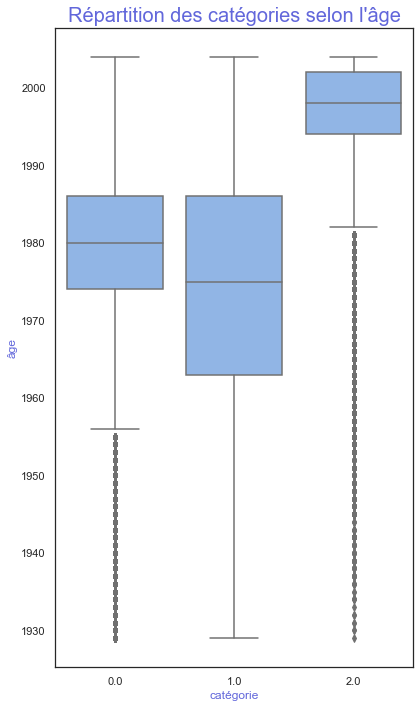

In [296]:
plt.figure(figsize=(6,10))
sns.boxplot(x=particuliers1['categ'], y=particuliers1['birth'],color='#83b3f3')
plt.xlabel("catégorie", fontsize=12, color='#6267db')
plt.ylabel("âge", fontsize=12, color='#6267db')
plt.title("Répartition des catégories selon l'âge", fontsize=20, color='#6267db')
plt.tight_layout()

In [297]:
particuliers1.groupby("categ")['birth'].agg('var')

categ
0.0    132.612743
1.0    249.434712
2.0     98.007304
Name: birth, dtype: float64

In [298]:
bartlett(particuliers1.birth[particuliers1.categ == 0],
        particuliers1.birth[particuliers1.categ == 1],
         particuliers1.birth[particuliers1.categ == 2])

BartlettResult(statistic=33008.910334204105, pvalue=0.0)

In [299]:
stats.levene(particuliers1.birth[particuliers1.categ == 0],
        particuliers1.birth[particuliers1.categ == 1],
         particuliers1.birth[particuliers1.categ == 2], center='median')

LeveneResult(statistic=23879.92163366652, pvalue=0.0)

In [300]:
particuliers1

,id_prod,date,session_id,client_id,price,categ,sex,birth,month_year,decade,age,birthclass
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05,1980,entre 32 et 52 ans,1972-1991
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,2021-07,1980,entre 32 et 52 ans,1972-1991
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,2022-08,1980,entre 32 et 52 ans,1972-1991
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,2022-06,1980,entre 32 et 52 ans,1972-1991
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,2021-08,1980,entre 32 et 52 ans,1972-1991
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,2021-07,2000,- de 22 ans,1992-2004
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,2022-03,1960,+ de 52 ans,1952-1971
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,2021-09,1960,+ de 52 ans,1952-1971
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,2021-03,1990,entre 22 et 32 ans,1992-2004


In [301]:
C = "categ" # qualitative
B = "birth" # quantitative

data2 = particuliers1


eta_squared(data2[C],data2[B])

0.1132752589826862

eta carré est relativement proche de 0, les moyennes d'âge par catégorie de livres achetés ne sont donc pas toutes significativement différentes. Il n'y aurait ainsi pas de forte relation entre ces deux variables.

In [302]:
particuliers1.groupby('categ').mean()['birth']

categ
0.0    1978.205426
1.0    1974.197087
2.0    1996.034492
Name: birth, dtype: float64

*Calcul de la p value*

In [329]:
a2 = particuliers1.birth[particuliers1.categ == 0]
b2 = particuliers1.birth[particuliers1.categ == 1]
c2 = particuliers1.birth[particuliers1.categ == 2]
#perform one-way ANOVA
f_oneway(a2, b2, c2)

F_onewayResult(statistic=40411.45306406694, pvalue=0.0)

Les pvalue sont exactement égales à 0.0 alors que éta carré est proche de 0. Nous pouvons poser les questionnements suivants : la puissance de test est elle trop importante ? Peut-il y avoir rejet abusif de H0 si la taille de l'échantillon devient trop grande ?

**test d'indépendance du khi-2**

Conditions :  

. Des valeurs qui constituent un échantillon aléatoire simple issu de la population visée.  
. Deux variables catégorielles ou nominales.  
. Pour chaque combinaison des niveaux des deux variables, nous avons au moins cinq valeurs attendues.


*Par classe d'âge*

In [304]:
X2 = "birthclass"
Y2 = "categ"

cont1 = particuliers1[[X2,Y2]].pivot_table(index=X2,columns=Y2,aggfunc=len,margins=True,margins_name="Total")
cont1

categ,0.0,1.0,2.0,Total
birthclass,,,,
1929-1951,13463,17176,289,30928
1952-1971,57909,74274,1205,133388
1972-1991,299424,92811,1475,393710
1992-2004,16697,28087,29879,74663
Total,387493,212348,32848,632689


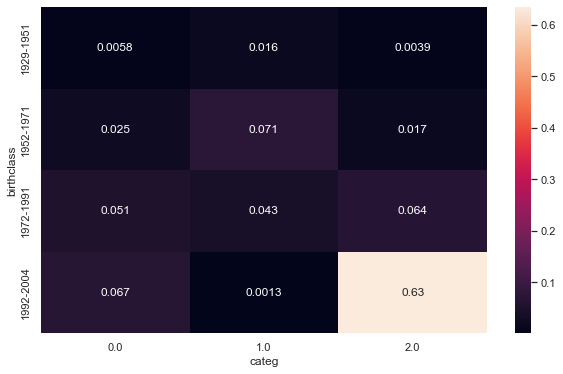

In [307]:
tx2 = cont1.loc[:,["Total"]]
ty2 = cont1.loc[["Total"],:]
n2 = len(particuliers1)
indep2 = tx2.dot(ty2) / n2

measure2 = (cont1-indep2)**2/indep2
xi_n2 = measure2.sum().sum()
table2 = measure2/xi_n2
sns.heatmap(table2.iloc[:-1,:-1],annot=True)
plt.show()

In [326]:
indep2

categ,0.0,1.0,2.0,Total
birthclass,,,,
1929-1951,18941.981770,10380.295760,1605.722470,30928.0
1952-1971,81694.033378,44768.717370,6925.249252,133388.0
1972-1991,241129.321088,132140.010463,20440.668448,393710.0
1992-2004,45727.663764,25058.976407,3876.359829,74663.0
Total,387493.000000,212348.000000,32848.000000,632689.0


In [327]:
measure2

categ,0.0,1.0,2.0,Total
birthclass,,,,
1929-1951,1584.799394,4448.967273,1079.737063,0.0
1952-1971,6924.958769,19445.759321,4724.920406,0.0
1972-1991,14093.141282,11705.546705,17597.104547,0.0
1992-2004,18430.406655,365.893911,174425.833936,0.0
Total,0.000000,0.000000,0.000000,0.0


Contribution à la non-indépendance très forte pour la classe d'âge 1992-2004 (achat de beaucoup de livres de catégorie 2)

In [308]:
xi_n2

274827.0692615208

H0 = L'âge du client et la catégorie des livres achetés sont indépendants  
seuil de 0.05

In [309]:
dll = (4-1) * (3-1)
dll

6

La valeur khi-deux avec α = 0,05 et six degrés de liberté est de 12,59.  
La valeur khi-deux avec α = 0,005 et six degrés de liberté est de 18,55.

Notre statistique de test est largement plus élevée que la valeur du khi-deux. L'hypothèse d'indépendance est donc rejetée. Nous ne pouvons pas maintenir l'hypothèse selon laquelle l'âge du client n'a aucun lien avec le fait d'acheter une certaine catégorie de livre.

*Calcul de la pvalue*

In [310]:
stats.chi2_contingency(cont1.iloc[:-1,:-1])

(274827.0692615208,
 0.0,
 6,
 array([[ 18941.98176987,  10380.29575984,   1605.72247028],
        [ 81694.03337817,  44768.71736983,   6925.249252  ],
        [241129.32108824, 132140.01046328,  20440.66844848],
        [ 45727.66376371,  25058.97640705,   3876.35982924]]))

Même questionnement que pour la pvalue du test ANOVA (0.0). Statistique de test trop élevée ?

*Par décennie*

In [311]:
X3 = "decade"
Y3 = "categ"

cont2 = particuliers1[[X3,Y3]].pivot_table(index=X3,columns=Y3,aggfunc=len,margins=True,margins_name="Total")
cont2

categ,0.0,1.0,2.0,Total
decade,,,,
1920-1930,2658,3336,69,6063
1940,8177,10417,178,18772
1950,21503,27584,452,49539
1960,30954,39620,646,71220
1970,127377,47788,713,175878
1980,153502,47549,764,201815
1990,35886,23756,16986,76628
2000,7436,12298,13040,32774
Total,387493,212348,32848,632689


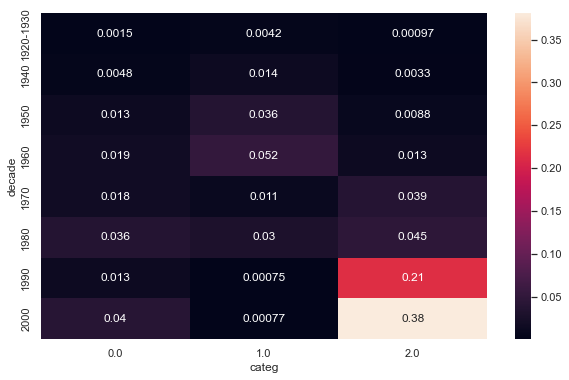

In [313]:
tx3 = cont2.loc[:,["Total"]]
ty3 = cont2.loc[["Total"],:]
n3 = len(particuliers1)
indep3 = tx3.dot(ty3) / n3

measure3 = (cont2-indep3)**2/indep3
xi_n3 = measure3.sum().sum()
table3 = measure3/xi_n3
sns.heatmap(table3.iloc[:-1,:-1],annot=True)
plt.show()

In [328]:
indep3

categ,0.0,1.0,2.0,Total
decade,,,,
1920-1930,3713.309476,2034.911187,314.779337,6063.0
1940,11496.989194,6300.404553,974.606254,18772.0
1950,30340.365846,16626.664241,2571.969913,49539.0
1960,43618.984145,23903.409985,3697.605870,71220.0
1970,107717.209963,59029.541440,9131.248598,175878.0
1980,123602.433099,67734.718985,10477.847916,201815.0
1990,46931.136157,25718.484981,3978.378862,76628.0
2000,20072.572120,10999.864629,1701.563251,32774.0
Total,387493.000000,212348.000000,32848.000000,632689.0


Contribution à la non-indépendance encore plus forte pour les clients nés lors des années 2000

In [314]:
xi_n3

198380.4654475713

In [315]:
stats.chi2_contingency(cont2.iloc[:-1,:-1])

(198380.46544757133,
 0.0,
 14,
 array([[  3713.3094759 ,   2034.91118701,    314.77933708],
        [ 11496.98919374,   6300.40455263,    974.60625363],
        [ 30340.36584641,  16626.66424104,   2571.96991255],
        [ 43618.98414545,  23903.409985  ,   3697.60586955],
        [107717.20996256,  59029.54143979,   9131.24859765],
        [123602.43309904,  67734.71898516,  10477.8479158 ],
        [ 46931.13615694,  25718.48498077,   3978.37886228],
        [ 20072.57211995,  10999.86462859,   1701.56325146]]))